In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

Total records: 464

Records per term:
Term
Term 1    173
Term 2    169
Term 3    122
Name: count, dtype: int64

Descriptive Statistics by Term:
       How often do you feel positive in school?                                               How often do you feel supported by your teachers and advisors?                                               How often do you feel listened to by your teachers and advisors?                                               How often do you feel listened to and supported by your friends?                                               How do you feel you are managing the workload?                                               To what extent do you feel the workload is making you feel stressed?                                              
                                           count      mean       std  min  25%  50%  75%   max                                                          count      mean       std  min  25%  50%  75%   max                   

C:\Users\Admin\AppData\Local\Temp\ipykernel_16872\366856566.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc_stats = clean_df.groupby('Term')[target_columns].describe()


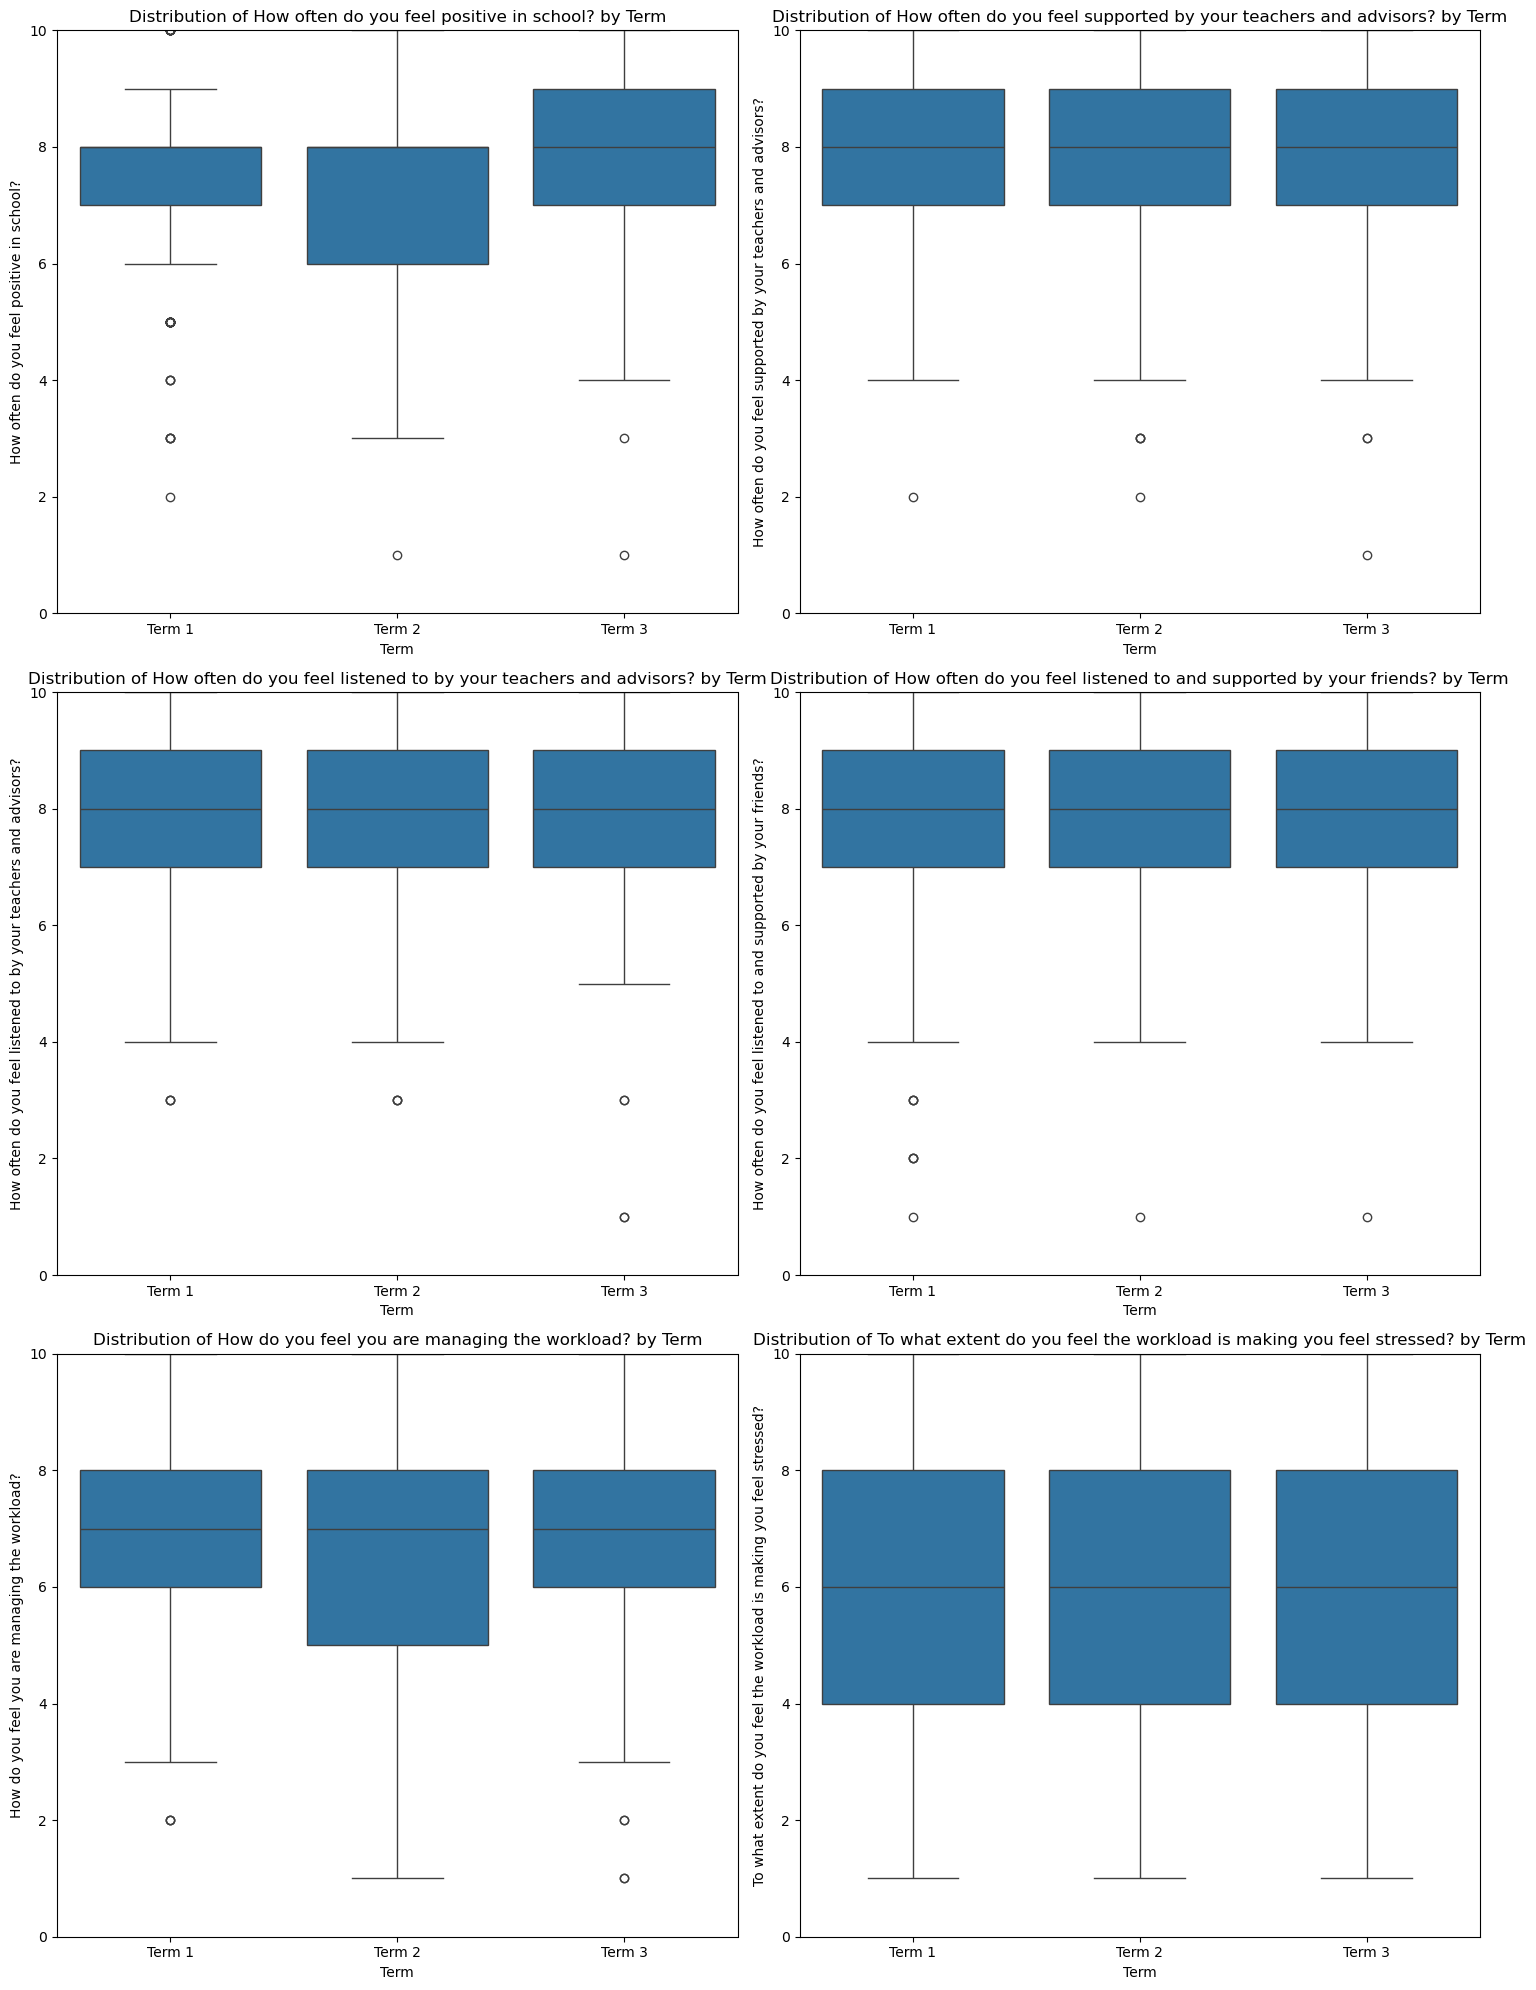


ANOVA for How often do you feel positive in school?:
F-value: 5.3891, p-value: 0.0049
Term 1 - Mean: 7.36 ± 1.59
Term 2 - Mean: 7.29 ± 1.59
Term 3 - Mean: 7.86 ± 1.45
Significant difference between terms!

Post-hoc Tukey HSD test:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Term 1 Term 2  -0.0742 0.8981 -0.4694  0.321  False
Term 1 Term 3   0.4965 0.0195  0.0645 0.9285   True
Term 2 Term 3   0.5707  0.006  0.1366 1.0048   True
---------------------------------------------------

ANOVA for How often do you feel supported by your teachers and advisors?:
F-value: 0.5600, p-value: 0.5716
Term 1 - Mean: 8.12 ± 1.51
Term 2 - Mean: 7.93 ± 1.64
Term 3 - Mean: 8.06 ± 1.68
No significant difference between terms.

ANOVA for How often do you feel listened to by your teachers and advisors?:
F-value: 0.1602, p-value: 0.8520
Term 1 - Mean: 8.06 ± 1.56
Term 2 - Mean: 7.97 ± 1.64
Term 3 - M

C:\Users\Admin\AppData\Local\Temp\ipykernel_16872\366856566.py:109: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Term', y=col, data=clean_df, ci='sd', capsize=0.1)


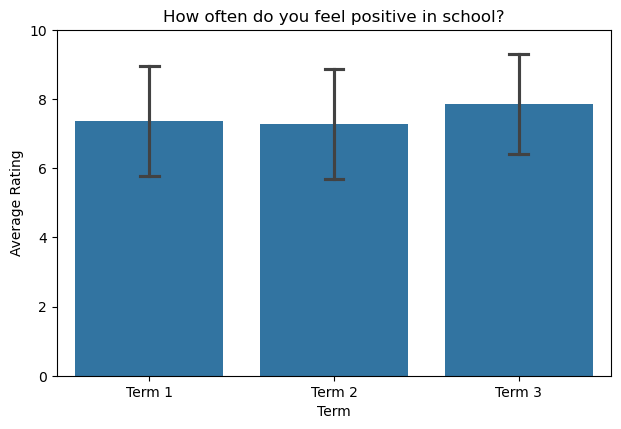


Two-way ANOVA for How often do you feel positive in school? (Term × SchoolLevel):


SyntaxError: invalid syntax (<unknown>, line 1)

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Set the display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Load the data
file_path = "D:/Wellbeing Survey Project/comined_terms.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Select the columns we're interested in
target_columns = [
    'How often do you feel positive in school?',
    'How often do you feel supported by your teachers and advisors?',
    'How often do you feel listened to by your teachers and advisors?',
    'How often do you feel listened to and supported by your friends?',
    'How do you feel you are managing the workload?',
    'To what extent do you feel the workload is making you feel stressed?'
]

# Filter the dataframe to only include our target terms and columns
terms_df = df[df['Term'].isin(['Term 1', 'Term 2', 'Term 3'])].copy()

# Convert term to categorical with proper ordering
terms_df['Term'] = pd.Categorical(terms_df['Term'], categories=['Term 1', 'Term 2', 'Term 3'], ordered=True)

# Clean the data - remove rows with missing values in our target columns
clean_df = terms_df.dropna(subset=target_columns)

# Display basic info about the data
print(f"Total records: {len(clean_df)}")
print("\nRecords per term:")
print(clean_df['Term'].value_counts().sort_index())

# 1. Descriptive Statistics
print("\nDescriptive Statistics by Term:")
desc_stats = clean_df.groupby('Term')[target_columns].describe()
print(desc_stats)

# 2. Visualization - Boxplots for each metric by term
plt.figure(figsize=(15, 20))
for i, col in enumerate(target_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Term', y=col, data=clean_df)
    plt.title(f'Distribution of {col} by Term')
    plt.ylim(0, 10)  # Assuming scale is 1-10
plt.tight_layout()
plt.show()

# 3. One-way ANOVA for each metric
results = {}

for col in target_columns:
    # One-way ANOVA
    term_groups = [clean_df[clean_df['Term'] == term][col] for term in ['Term 1', 'Term 2', 'Term 3']]
    f_val, p_val = stats.f_oneway(*term_groups)
    
    # Store results
    results[col] = {
        'F-value': f_val,
        'p-value': p_val,
        'Term 1 Mean': term_groups[0].mean(),
        'Term 2 Mean': term_groups[1].mean(),
        'Term 3 Mean': term_groups[2].mean(),
        'Term 1 Std': term_groups[0].std(),
        'Term 2 Std': term_groups[1].std(),
        'Term 3 Std': term_groups[2].std()
    }
    
    # Print results
    print(f"\nANOVA for {col}:")
    print(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}")
    print(f"Term 1 - Mean: {term_groups[0].mean():.2f} ± {term_groups[0].std():.2f}")
    print(f"Term 2 - Mean: {term_groups[1].mean():.2f} ± {term_groups[1].std():.2f}")
    print(f"Term 3 - Mean: {term_groups[2].mean():.2f} ± {term_groups[2].std():.2f}")
    
    if p_val < 0.05:
        print("Significant difference between terms!")
        
        # Perform post-hoc Tukey test if ANOVA is significant
        print("\nPost-hoc Tukey HSD test:")
        tukey = pairwise_tukeyhsd(endog=clean_df[col],
                                 groups=clean_df['Term'],
                                 alpha=0.05)
        print(tukey)
    else:
        print("No significant difference between terms.")

# 4. Create a summary DataFrame of results
results_df = pd.DataFrame(results).T
results_df['Significant'] = results_df['p-value'] < 0.05
print("\nSummary of ANOVA Results:")
print(results_df)

# 5. Visualize significant differences
sig_cols = results_df[results_df['Significant']].index

plt.figure(figsize=(12, 8))
for i, col in enumerate(sig_cols, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Term', y=col, data=clean_df, ci='sd', capsize=0.1)
    plt.title(f'{col}')
    plt.ylabel('Average Rating')
    plt.ylim(0, 10)
plt.tight_layout()
plt.show()

# 6. Additional analysis - Two-way ANOVA with School Level
for col in target_columns:
    print(f"\nTwo-way ANOVA for {col} (Term × SchoolLevel):")
    model = ols(f'{col} ~ C(Term) + C(SchoolLevel) + C(Term):C(SchoolLevel)', data=clean_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)
    
    # Check for significant interaction
    if anova_table['PR(>F)']['C(Term):C(SchoolLevel)'] < 0.05:
        print("\nSignificant interaction effect found! Analyzing separately by SchoolLevel:")
        
        # Analyze middle school separately
        ms_df = clean_df[clean_df['SchoolLevel'] == 'Middle School']
        print("\nMiddle School:")
        ms_groups = [ms_df[ms_df['Term'] == term][col] for term in ['Term 1', 'Term 2', 'Term 3']]
        f_val, p_val = stats.f_oneway(*ms_groups)
        print(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}")
        if p_val < 0.05:
            tukey = pairwise_tukeyhsd(endog=ms_df[col],
                                     groups=ms_df['Term'],
                                     alpha=0.05)
            print(tukey)
        
        # Analyze high school separately
        hs_df = clean_df[clean_df['SchoolLevel'] == 'High School']
        print("\nHigh School:")
        hs_groups = [hs_df[hs_df['Term'] == term][col] for term in ['Term 1', 'Term 2', 'Term 3']]
        f_val, p_val = stats.f_oneway(*hs_groups)
        print(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}")
        if p_val < 0.05:
            tukey = pairwise_tukeyhsd(endog=hs_df[col],
                                     groups=hs_df['Term'],
                                     alpha=0.05)
            print(tukey)

Total records: 464

Records per term:
Term
Term 1    173
Term 2    169
Term 3    122
Name: count, dtype: int64

Descriptive Statistics by Term:
       How_often_do_you_feel_positive_in_school                                               How_often_do_you_feel_supported_by_your_teachers_and_advisors                                               How_often_do_you_feel_listened_to_by_your_teachers_and_advisors                                               How_often_do_you_feel_listened_to_and_supported_by_your_friends                                               How_do_you_feel_you_are_managing_the_workload                                               To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed                                              
                                          count      mean       std  min  25%  50%  75%   max                                                         count      mean       std  min  25%  50%  75%   max                           

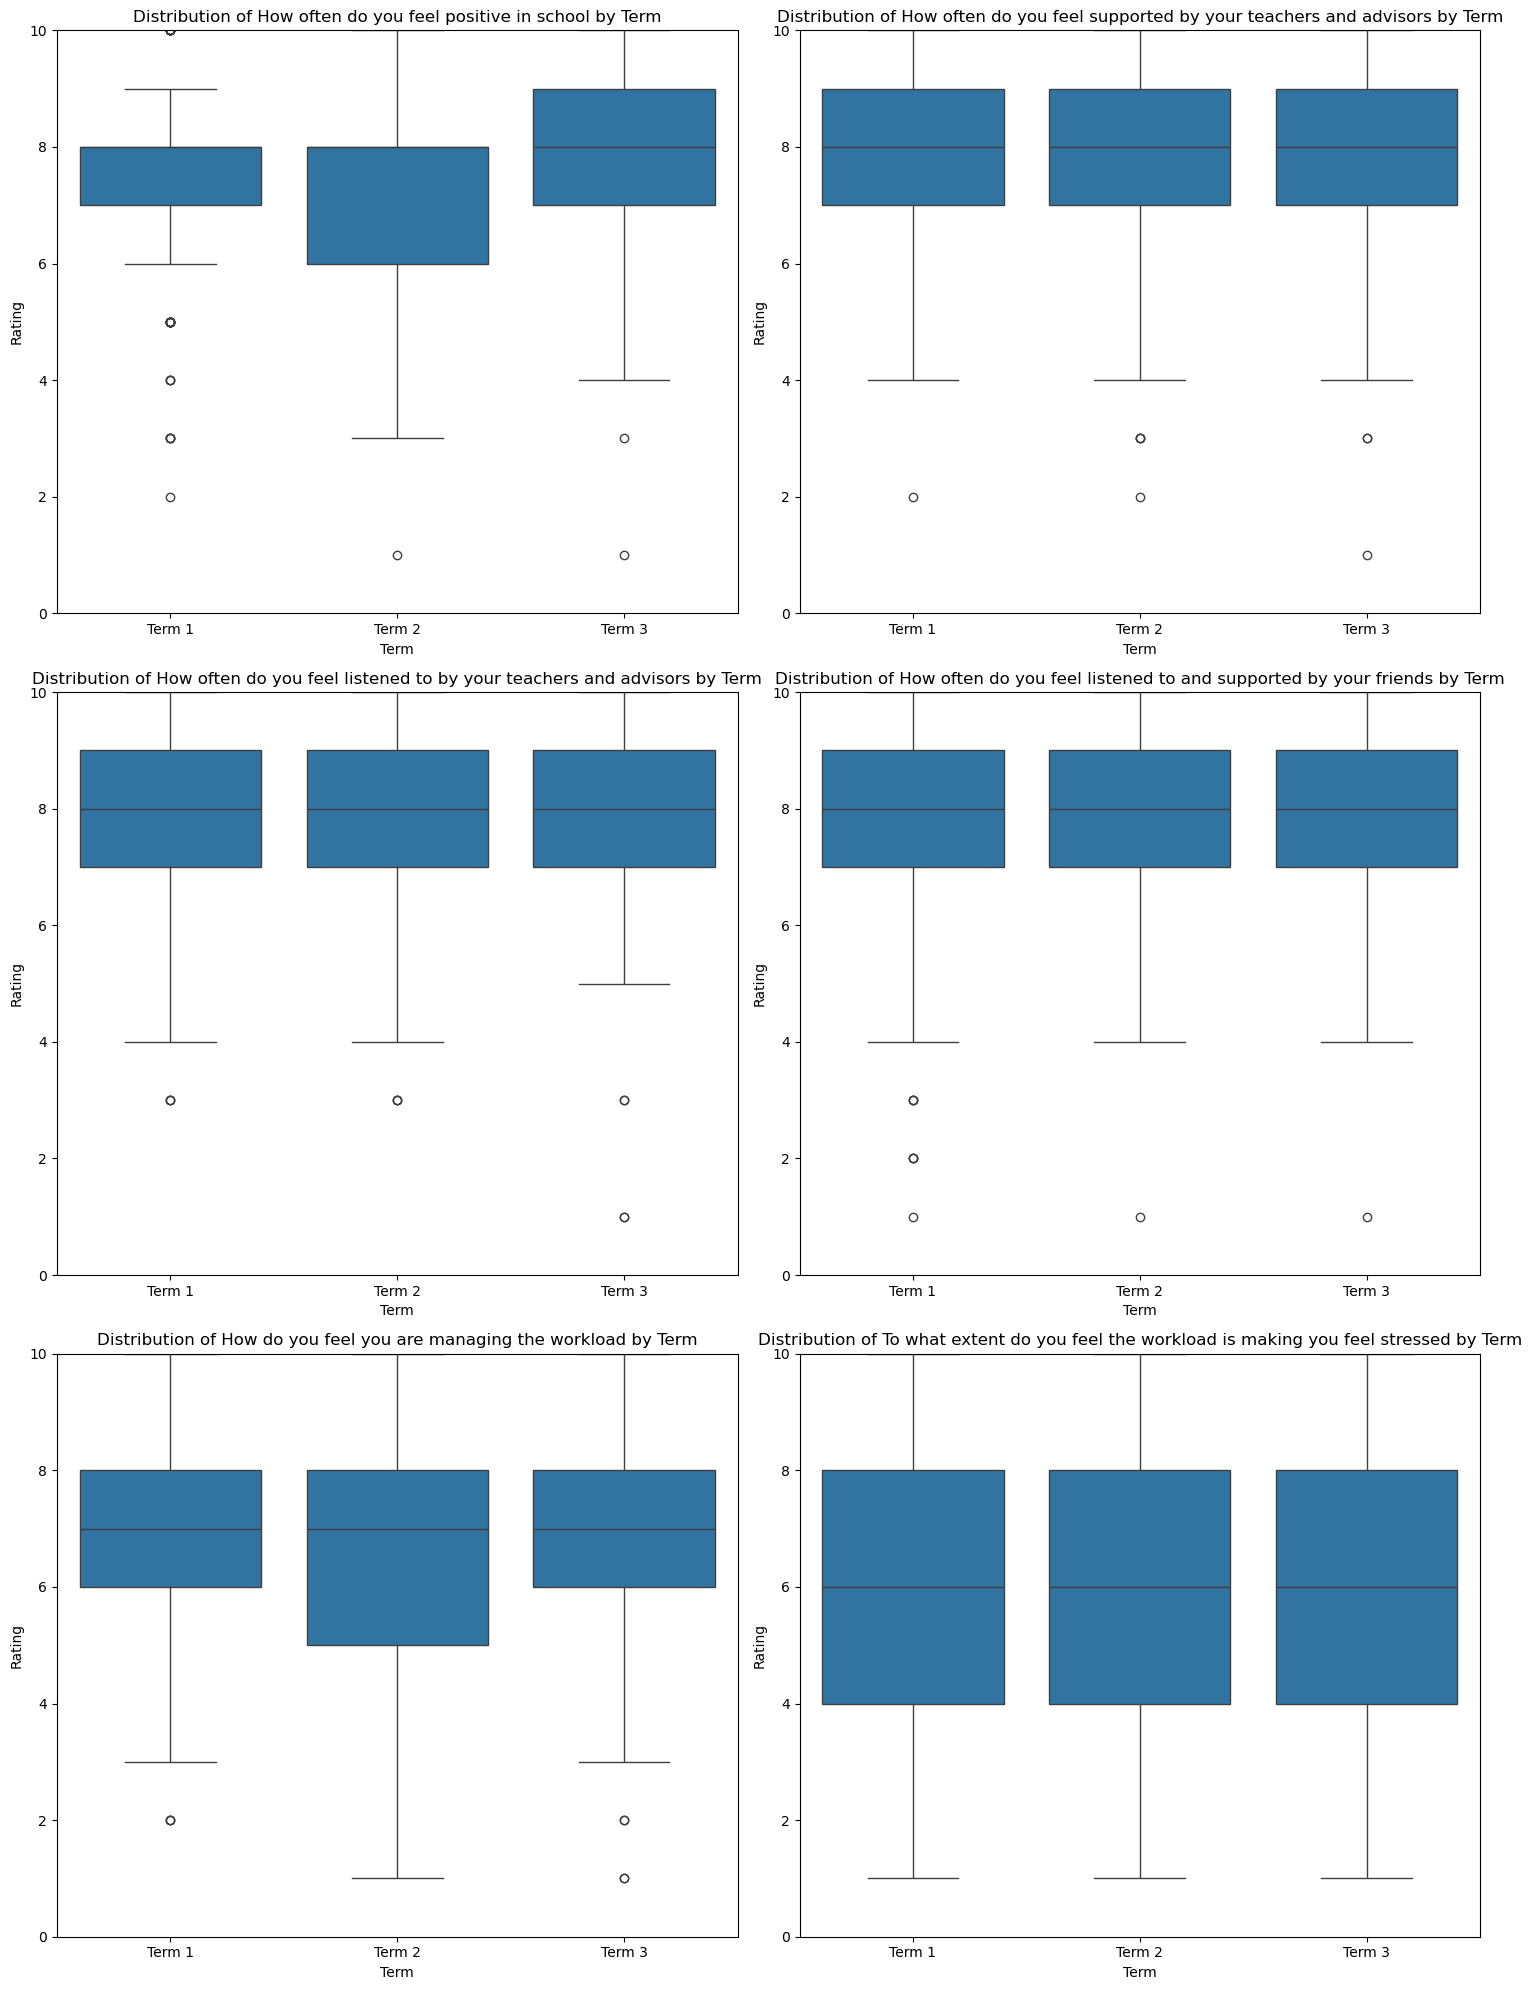


ANOVA for How often do you feel positive in school:
F-value: 5.3891, p-value: 0.0049
Term 1 - Mean: 7.36 ± 1.59
Term 2 - Mean: 7.29 ± 1.59
Term 3 - Mean: 7.86 ± 1.45
Significant difference between terms!

Post-hoc Tukey HSD test:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Term 1 Term 2  -0.0742 0.8981 -0.4694  0.321  False
Term 1 Term 3   0.4965 0.0195  0.0645 0.9285   True
Term 2 Term 3   0.5707  0.006  0.1366 1.0048   True
---------------------------------------------------


<Figure size 800x500 with 0 Axes>

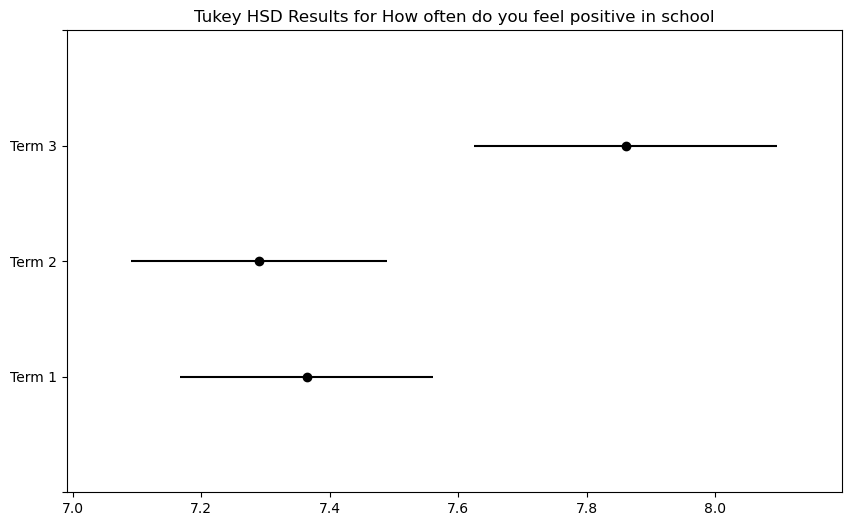


ANOVA for How often do you feel supported by your teachers and advisors:
F-value: 0.5600, p-value: 0.5716
Term 1 - Mean: 8.12 ± 1.51
Term 2 - Mean: 7.93 ± 1.64
Term 3 - Mean: 8.06 ± 1.68
No significant difference between terms.

ANOVA for How often do you feel listened to by your teachers and advisors:
F-value: 0.1602, p-value: 0.8520
Term 1 - Mean: 8.06 ± 1.56
Term 2 - Mean: 7.97 ± 1.64
Term 3 - Mean: 8.05 ± 1.65
No significant difference between terms.

ANOVA for How often do you feel listened to and supported by your friends:
F-value: 0.3587, p-value: 0.6988
Term 1 - Mean: 7.90 ± 1.91
Term 2 - Mean: 7.96 ± 1.61
Term 3 - Mean: 8.07 ± 1.59
No significant difference between terms.

ANOVA for How do you feel you are managing the workload:
F-value: 2.8397, p-value: 0.0595
Term 1 - Mean: 6.73 ± 1.78
Term 2 - Mean: 6.48 ± 1.93
Term 3 - Mean: 7.01 ± 1.92
No significant difference between terms.

ANOVA for To what extent do you feel the workload is making you feel stressed:
F-value: 1.2655,

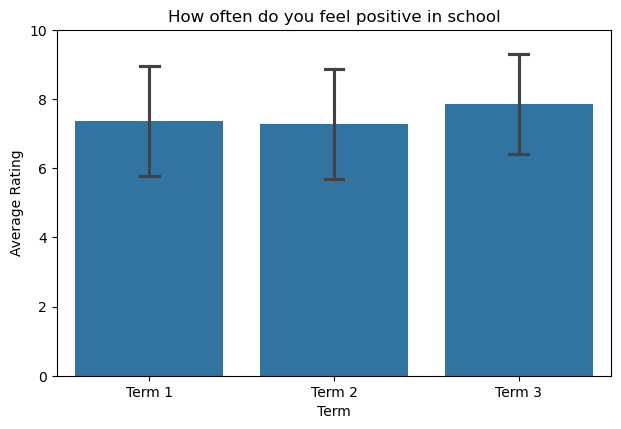


Two-way ANOVA for How often do you feel positive in school (Term × SchoolLevel):
                             sum_sq     df         F    PR(>F)
C(Term)                   26.121379    2.0  5.469289  0.004494
C(SchoolLevel)             0.185566    1.0  0.077708  0.780554
C(Term):C(SchoolLevel)    19.590069    2.0  4.101765  0.017155
Residual                1093.706215  458.0       NaN       NaN

Significant interaction effect found! Analyzing separately by SchoolLevel:

Middle School:
F-value: 2.3384, p-value: 0.0986

High School:
F-value: 7.5593, p-value: 0.0007
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Term 1 Term 2   0.2621 0.4982 -0.2867 0.8108  False
Term 1 Term 3   1.1185 0.0004  0.4358 1.8011   True
Term 2 Term 3   0.8564 0.0107  0.1646 1.5482   True
---------------------------------------------------

Two-way ANOVA for How often do you feel supported by your teachers

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Set the display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Load the data
file_path = "D:/Wellbeing Survey Project/comined_terms.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Clean column names by removing special characters and making them valid Python identifiers
df.columns = [col.replace('?', '').replace(' ', '_').strip() for col in df.columns]

# Select the columns we're interested in (using cleaned names)
target_columns = [
    'How_often_do_you_feel_positive_in_school',
    'How_often_do_you_feel_supported_by_your_teachers_and_advisors',
    'How_often_do_you_feel_listened_to_by_your_teachers_and_advisors',
    'How_often_do_you_feel_listened_to_and_supported_by_your_friends',
    'How_do_you_feel_you_are_managing_the_workload',
    'To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed'
]

# Filter the dataframe to only include our target terms and columns
terms_df = df[df['Term'].isin(['Term 1', 'Term 2', 'Term 3'])].copy()

# Convert term to categorical with proper ordering
terms_df['Term'] = pd.Categorical(terms_df['Term'], categories=['Term 1', 'Term 2', 'Term 3'], ordered=True)

# Clean the data - remove rows with missing values in our target columns
clean_df = terms_df.dropna(subset=target_columns)

# Display basic info about the data
print(f"Total records: {len(clean_df)}")
print("\nRecords per term:")
print(clean_df['Term'].value_counts().sort_index())

# 1. Descriptive Statistics
print("\nDescriptive Statistics by Term:")
desc_stats = clean_df.groupby('Term', observed=True)[target_columns].describe()
print(desc_stats)

# 2. Visualization - Boxplots for each metric by term
plt.figure(figsize=(15, 20))
for i, col in enumerate(target_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Term', y=col, data=clean_df)
    plt.title(f'Distribution of {col.replace("_", " ")} by Term')
    plt.ylim(0, 10)  # Assuming scale is 1-10
    plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# 3. One-way ANOVA for each metric
results = {}

for col in target_columns:
    # One-way ANOVA
    term_groups = [clean_df[clean_df['Term'] == term][col] for term in ['Term 1', 'Term 2', 'Term 3']]
    f_val, p_val = stats.f_oneway(*term_groups)
    
    # Store results
    results[col] = {
        'F-value': f_val,
        'p-value': p_val,
        'Term 1 Mean': term_groups[0].mean(),
        'Term 2 Mean': term_groups[1].mean(),
        'Term 3 Mean': term_groups[2].mean(),
        'Term 1 Std': term_groups[0].std(),
        'Term 2 Std': term_groups[1].std(),
        'Term 3 Std': term_groups[2].std()
    }
    
    # Print results
    print(f"\nANOVA for {col.replace('_', ' ')}:")
    print(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}")
    print(f"Term 1 - Mean: {term_groups[0].mean():.2f} ± {term_groups[0].std():.2f}")
    print(f"Term 2 - Mean: {term_groups[1].mean():.2f} ± {term_groups[1].std():.2f}")
    print(f"Term 3 - Mean: {term_groups[2].mean():.2f} ± {term_groups[2].std():.2f}")
    
    if p_val < 0.05:
        print("Significant difference between terms!")
        
        # Perform post-hoc Tukey test if ANOVA is significant
        print("\nPost-hoc Tukey HSD test:")
        tukey = pairwise_tukeyhsd(endog=clean_df[col],
                                 groups=clean_df['Term'],
                                 alpha=0.05)
        print(tukey)
        
        # Plot the results
        plt.figure(figsize=(8, 5))
        tukey.plot_simultaneous()
        plt.title(f"Tukey HSD Results for {col.replace('_', ' ')}")
        plt.show()
    else:
        print("No significant difference between terms.")

# 4. Create a summary DataFrame of results
results_df = pd.DataFrame(results).T
results_df['Significant'] = results_df['p-value'] < 0.05
print("\nSummary of ANOVA Results:")
print(results_df)

# 5. Visualize significant differences
sig_cols = results_df[results_df['Significant']].index

if len(sig_cols) > 0:
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(sig_cols, 1):
        plt.subplot(2, 2, i)
        sns.barplot(x='Term', y=col, data=clean_df, errorbar='sd', capsize=0.1)
        plt.title(f'{col.replace("_", " ")}')
        plt.ylabel('Average Rating')
        plt.ylim(0, 10)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo significant differences found in any metrics.")

# 6. Additional analysis - Two-way ANOVA with School Level
if 'SchoolLevel' in clean_df.columns:
    for col in target_columns:
        print(f"\nTwo-way ANOVA for {col.replace('_', ' ')} (Term × SchoolLevel):")
        try:
            # Create a formula-safe column name
            safe_col = col.replace(' ', '_').replace('?', '')
            
            model = ols(f'{safe_col} ~ C(Term) + C(SchoolLevel) + C(Term):C(SchoolLevel)', 
                       data=clean_df).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            print(anova_table)
            
            # Check for significant interaction
            if 'C(Term):C(SchoolLevel)' in anova_table.index:
                if anova_table.loc['C(Term):C(SchoolLevel)', 'PR(>F)'] < 0.05:
                    print("\nSignificant interaction effect found! Analyzing separately by SchoolLevel:")
                    
                    # Analyze middle school separately
                    if 'Middle School' in clean_df['SchoolLevel'].unique():
                        ms_df = clean_df[clean_df['SchoolLevel'] == 'Middle School']
                        print("\nMiddle School:")
                        ms_groups = [ms_df[ms_df['Term'] == term][col] for term in ['Term 1', 'Term 2', 'Term 3']]
                        f_val, p_val = stats.f_oneway(*ms_groups)
                        print(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}")
                        if p_val < 0.05:
                            tukey = pairwise_tukeyhsd(endog=ms_df[col],
                                                     groups=ms_df['Term'],
                                                     alpha=0.05)
                            print(tukey)
                    
                    # Analyze high school separately
                    if 'High School' in clean_df['SchoolLevel'].unique():
                        hs_df = clean_df[clean_df['SchoolLevel'] == 'High School']
                        print("\nHigh School:")
                        hs_groups = [hs_df[hs_df['Term'] == term][col] for term in ['Term 1', 'Term 2', 'Term 3']]
                        f_val, p_val = stats.f_oneway(*hs_groups)
                        print(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}")
                        if p_val < 0.05:
                            tukey = pairwise_tukeyhsd(endog=hs_df[col],
                                                     groups=hs_df['Term'],
                                                     alpha=0.05)
                            print(tukey)
        except Exception as e:
            print(f"Error analyzing {col}: {str(e)}")
else:
    print("\nSchoolLevel column not found in data. Skipping two-way ANOVA.")

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display

# Set up display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set_style("whitegrid")  # Use seaborn's whitegrid style

# Load and prepare data
file_path = "D:/Wellbeing Survey Project/comined_terms.xlsx"
try:
    df = pd.read_excel(file_path, sheet_name='Sheet1')
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    print("Please verify the file path and try again.")
    raise

# Clean column names
df.columns = [col.replace('?', '').replace(' ', '_').strip() for col in df.columns]

# Target columns
target_columns = [
    'How_often_do_you_feel_positive_in_school',
    'How_often_do_you_feel_supported_by_your_teachers_and_advisors',
    'How_often_do_you_feel_listened_to_by_your_teachers_and_advisors',
    'How_often_do_you_feel_listened_to_and_supported_by_your_friends',
    'How_do_you_feel_you_are_managing_the_workload',
    'To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed'
]

# Filter and clean data
terms_df = df[df['Term'].isin(['Term 1', 'Term 2', 'Term 3'])].copy()
terms_df['Term'] = pd.Categorical(terms_df['Term'], categories=['Term 1', 'Term 2', 'Term 3'], ordered=True)
clean_df = terms_df.dropna(subset=target_columns)

# 1. Create formatted descriptive statistics tables
def create_descriptive_table(data, columns, group_by='Term'):
    """Create a well-formatted descriptive statistics table"""
    desc = data.groupby(group_by, observed=True)[columns].describe()
    
    # Flatten the multi-index and create clean column names
    desc = desc.unstack().unstack(level=0).T
    desc.index.names = ['Statistic', 'Variable']
    
    # Select only the statistics we want to display
    stats_to_show = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    desc = desc.loc[stats_to_show]
    
    # Format numbers
    desc = desc.applymap(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)
    
    return desc

# Display descriptive tables
print("\nDESCRIPTIVE STATISTICS BY TERM")
desc_table = create_descriptive_table(clean_df, target_columns)
display(desc_table)

# 2. Create summary statistics table for easy comparison
def create_summary_table(data, columns, group_by='Term'):
    """Create a summary table comparing terms"""
    summary = data.groupby(group_by, observed=True)[columns].agg(['mean', 'std', 'count'])
    summary = summary.stack().unstack(level=0)
    
    # Format numbers
    formatted_summary = summary.copy()
    for stat in ['mean', 'std']:
        formatted_summary[stat] = formatted_summary[stat].map('{:.2f}'.format)
    
    return formatted_summary

# Display summary table
print("\nSUMMARY STATISTICS COMPARISON")
summary_table = create_summary_table(clean_df, target_columns)
display(summary_table)

# 3. Visualize mean differences with confidence intervals
plt.figure(figsize=(14, 8))
for i, col in enumerate(target_columns, 1):
    plt.subplot(2, 3, i)
    sns.pointplot(x='Term', y=col, data=clean_df, errorbar=('ci', 95), capsize=0.1)
    plt.title(col.replace('_', ' ')[:30] + ('...' if len(col) > 30 else ''))
    plt.ylim(0, 10)
    plt.ylabel('Rating (1-10)')
plt.tight_layout()
plt.show()

# 4. ANOVA and post-hoc tests
results = []
for col in target_columns:
    term_groups = [clean_df[clean_df['Term'] == term][col] for term in ['Term 1', 'Term 2', 'Term 3']]
    f_val, p_val = stats.f_oneway(*term_groups)
    
    # Calculate effect size (eta squared)
    eta_sq = f_val * (len(term_groups)-1) / (f_val * (len(term_groups)-1) + (len(clean_df)-len(term_groups)))
    
    results.append({
        'Metric': col.replace('_', ' '),
        'F-value': f"{f_val:.2f}",
        'p-value': f"{p_val:.4f}",
        'Effect Size (η²)': f"{eta_sq:.3f}",
        'Term 1 Mean ± SD': f"{term_groups[0].mean():.2f} ± {term_groups[0].std():.2f}",
        'Term 2 Mean ± SD': f"{term_groups[1].mean():.2f} ± {term_groups[1].std():.2f}",
        'Term 3 Mean ± SD': f"{term_groups[2].mean():.2f} ± {term_groups[2].std():.2f}",
        'Significant': "Yes" if p_val < 0.05 else "No"
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display ANOVA results
print("\nANOVA RESULTS ACROSS TERMS")
display(results_df)

# Add some space at the end
print("\nAnalysis complete.")


DESCRIPTIVE STATISTICS BY TERM


ValueError: Length of new names must be 1, got 2


DESCRIPTIVE STATISTICS BY TERM


,Term 1 count,Term 2 count,Term 3 count,Term 1 mean,Term 2 mean,Term 3 mean,Term 1 std,Term 2 std,Term 3 std,Term 1 min,Term 2 min,Term 3 min,Term 1 25%,Term 2 25%,Term 3 25%,Term 1 50%,Term 2 50%,Term 3 50%,Term 1 75%,Term 2 75%,Term 3 75%,Term 1 max,Term 2 max,Term 3 max
Variable,,,,,,,,,,,,,,,,,,,,,,,,
How_do_you_feel_you_are_managing_the_workload,173.00,169.00,122.00,6.73,6.48,7.01,1.78,1.93,1.92,2.00,1.00,1.00,6.00,5.00,6.00,7.00,7.00,7.00,8.00,8.00,8.00,10.00,10.00,10.00
How_often_do_you_feel_listened_to_and_supported_by_your_friends,173.00,169.00,122.00,7.90,7.96,8.07,1.91,1.61,1.59,1.00,1.00,1.00,7.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,173.00,169.00,122.00,8.06,7.97,8.05,1.56,1.64,1.65,3.00,3.00,1.00,7.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_positive_in_school,173.00,169.00,122.00,7.36,7.29,7.86,1.59,1.59,1.45,2.00,1.00,1.00,7.00,6.00,7.00,8.00,8.00,8.00,8.00,8.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_supported_by_your_teachers_and_advisors,173.00,169.00,122.00,8.12,7.93,8.06,1.51,1.64,1.68,2.00,2.00,1.00,7.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,173.00,169.00,122.00,5.73,5.67,6.09,2.39,2.35,2.32,1.00,1.00,1.00,4.00,4.00,4.00,6.00,6.00,6.00,8.00,8.00,8.00,10.00,10.00,10.00



SUMMARY STATISTICS COMPARISON


,count - How_do_you_feel_you_are_managing_the_workload,count - How_often_do_you_feel_listened_to_and_supported_by_your_friends,count - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,count - How_often_do_you_feel_positive_in_school,count - How_often_do_you_feel_supported_by_your_teachers_and_advisors,count - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,mean - How_do_you_feel_you_are_managing_the_workload,mean - How_often_do_you_feel_listened_to_and_supported_by_your_friends,mean - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,mean - How_often_do_you_feel_positive_in_school,mean - How_often_do_you_feel_supported_by_your_teachers_and_advisors,mean - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,std - How_do_you_feel_you_are_managing_the_workload,std - How_often_do_you_feel_listened_to_and_supported_by_your_friends,std - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,std - How_often_do_you_feel_positive_in_school,std - How_often_do_you_feel_supported_by_your_teachers_and_advisors,std - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed
Term,,,,,,,,,,,,,,,,,,
Term 1,173,173,173,173,173,173,6.73,7.90,8.06,7.36,8.12,5.73,1.78,1.91,1.56,1.59,1.51,2.39
Term 2,169,169,169,169,169,169,6.48,7.96,7.97,7.29,7.93,5.67,1.93,1.61,1.64,1.59,1.64,2.35
Term 3,122,122,122,122,122,122,7.01,8.07,8.05,7.86,8.06,6.09,1.92,1.59,1.65,1.45,1.68,2.32


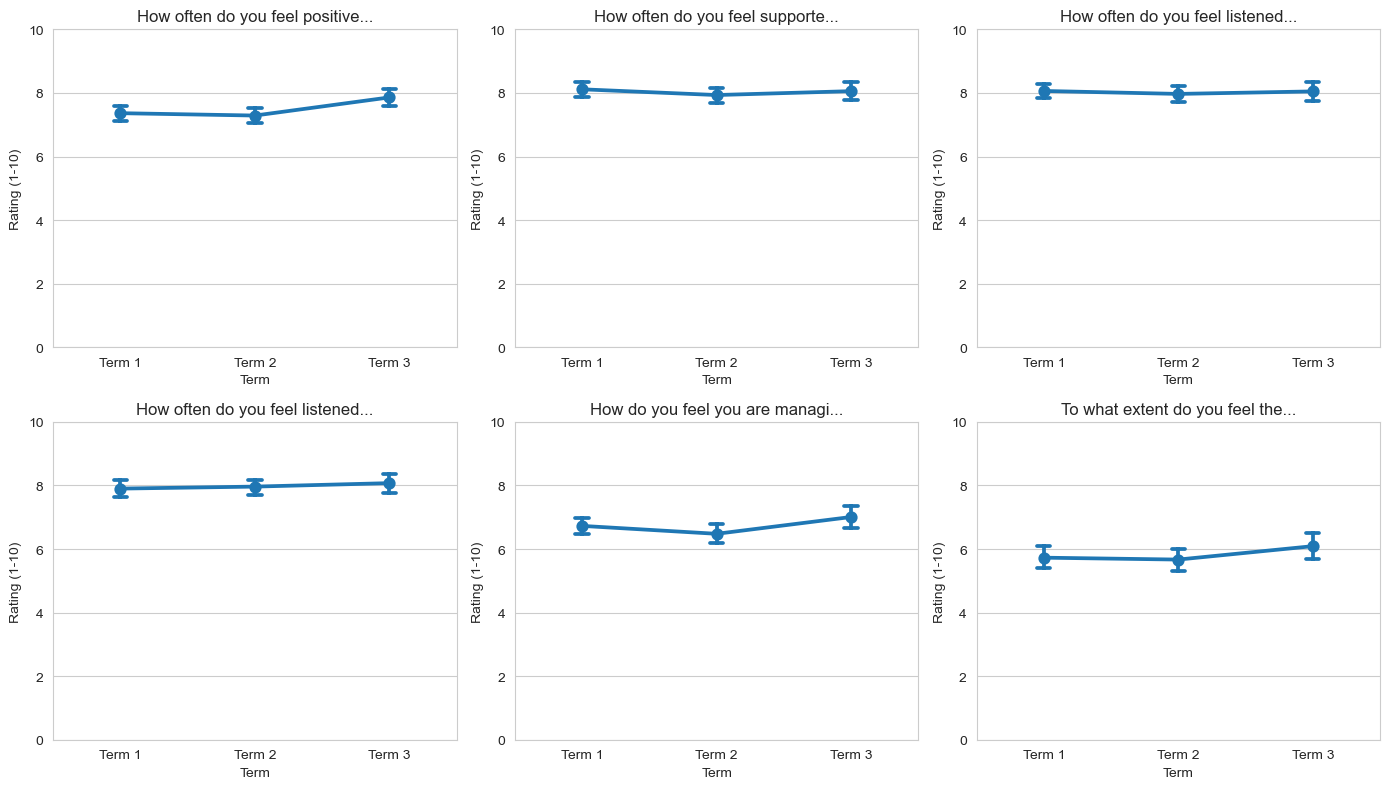


ANOVA RESULTS ACROSS TERMS


,Metric,F-value,p-value,Effect Size (η²),Term 1 Mean ± SD,Term 2 Mean ± SD,Term 3 Mean ± SD,Significant
0,How often do you feel positive in school,5.39,0.0049,0.023,7.36 ± 1.59,7.29 ± 1.59,7.86 ± 1.45,Yes
1,How often do you feel supported by your teache...,0.56,0.5716,0.002,8.12 ± 1.51,7.93 ± 1.64,8.06 ± 1.68,No
2,How often do you feel listened to by your teac...,0.16,0.8520,0.001,8.06 ± 1.56,7.97 ± 1.64,8.05 ± 1.65,No
3,How often do you feel listened to and supporte...,0.36,0.6988,0.002,7.90 ± 1.91,7.96 ± 1.61,8.07 ± 1.59,No
4,How do you feel you are managing the workload,2.84,0.0595,0.012,6.73 ± 1.78,6.48 ± 1.93,7.01 ± 1.92,No
5,To what extent do you feel the workload is mak...,1.27,0.2831,0.005,5.73 ± 2.39,5.67 ± 2.35,6.09 ± 2.32,No



Analysis complete.


In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from IPython.display import display

# Set up display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set_style("whitegrid")

# Load and prepare data
file_path = "D:/Wellbeing Survey Project/comined_terms.xlsx"
try:
    df = pd.read_excel(file_path, sheet_name='Sheet1')
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    print("Please verify the file path and try again.")
    raise

# Clean column names
df.columns = [col.replace('?', '').replace(' ', '_').strip() for col in df.columns]

# Target columns
target_columns = [
    'How_often_do_you_feel_positive_in_school',
    'How_often_do_you_feel_supported_by_your_teachers_and_advisors',
    'How_often_do_you_feel_listened_to_by_your_teachers_and_advisors',
    'How_often_do_you_feel_listened_to_and_supported_by_your_friends',
    'How_do_you_feel_you_are_managing_the_workload',
    'To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed'
]

# Filter and clean data
terms_df = df[df['Term'].isin(['Term 1', 'Term 2', 'Term 3'])].copy()
terms_df['Term'] = pd.Categorical(terms_df['Term'], categories=['Term 1', 'Term 2', 'Term 3'], ordered=True)
clean_df = terms_df.dropna(subset=target_columns)

# 1. Create formatted descriptive statistics tables
def create_descriptive_table(data, columns, group_by='Term'):
    """Create a well-formatted descriptive statistics table"""
    # Calculate statistics for each term
    stats_list = []
    for term in ['Term 1', 'Term 2', 'Term 3']:
        term_data = data[data[group_by] == term][columns]
        stats = term_data.describe().T
        stats['Term'] = term
        stats_list.append(stats)
    
    # Combine all terms
    all_stats = pd.concat(stats_list)
    
    # Select and order the statistics we want
    stats_to_show = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    all_stats = all_stats[stats_to_show + ['Term']]
    
    # Reset index to get Variable as a column
    all_stats.reset_index(inplace=True)
    all_stats.rename(columns={'index': 'Variable'}, inplace=True)
    
    # Format numbers
    for col in stats_to_show:
        all_stats[col] = all_stats[col].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)
    
    # Pivot for better display
    pivot_df = all_stats.pivot(index='Variable', columns='Term', values=stats_to_show)
    
    # Flatten multi-index columns
    pivot_df.columns = [f"{stat} {term}" for term, stat in pivot_df.columns]
    
    return pivot_df

# Display descriptive tables
print("\nDESCRIPTIVE STATISTICS BY TERM")
desc_table = create_descriptive_table(clean_df, target_columns)
display(desc_table)

# 2. Create summary statistics table for easy comparison
def create_summary_table(data, columns, group_by='Term'):
    """Create a summary table comparing terms without MultiIndex issues."""
    summary = data.groupby(group_by, observed=True)[columns].agg(['mean', 'std', 'count'])

    # Swap levels to have (statistic, variable) for easier formatting
    summary = summary.swaplevel(axis=1).sort_index(axis=1, level=0)

    # Format numbers consistently
    for stat in ['mean', 'std']:
        for col in columns:
            summary[(stat, col)] = summary[(stat, col)].map('{:.2f}'.format)

    # Flatten columns for display
    summary.columns = [f"{stat} - {col}" for stat, col in summary.columns]

    return summary


# Display summary table
print("\nSUMMARY STATISTICS COMPARISON")
summary_table = create_summary_table(clean_df, target_columns)
display(summary_table)
# Create output folder if it does not exist
output_folder = "Wellbeing_Charts"
os.makedirs(output_folder, exist_ok=True)
# 3. Visualize mean differences with confidence intervals
plt.figure(figsize=(14, 8))
for i, col in enumerate(target_columns, 1):
    plt.subplot(2, 3, i)
    sns.pointplot(x='Term', y=col, data=clean_df, errorbar=('ci', 95), capsize=0.1)
    plt.title(col.replace('_', ' ')[:30] + ('...' if len(col) > 30 else ''))
    plt.ylim(0, 10)
    plt.ylabel('Rating (1-10)')
plt.tight_layout()
plt.savefig(wellbeing_viz)
filename = f"{output_folder}/{level.replace(' ', '_')}_Wellbeing_Term_Comparison.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Chart saved to {filename}")
# 4. ANOVA and post-hoc tests
results = []
for col in target_columns:
    term_groups = [clean_df[clean_df['Term'] == term][col] for term in ['Term 1', 'Term 2', 'Term 3']]
    f_val, p_val = stats.f_oneway(*term_groups)
    
    # Calculate effect size (eta squared)
    eta_sq = f_val * (len(term_groups)-1) / (f_val * (len(term_groups)-1) + (len(clean_df)-len(term_groups)))
    
    results.append({
        'Metric': col.replace('_', ' '),
        'F-value': f"{f_val:.2f}",
        'p-value': f"{p_val:.4f}",
        'Effect Size (η²)': f"{eta_sq:.3f}",
        'Term 1 Mean ± SD': f"{term_groups[0].mean():.2f} ± {term_groups[0].std():.2f}",
        'Term 2 Mean ± SD': f"{term_groups[1].mean():.2f} ± {term_groups[1].std():.2f}",
        'Term 3 Mean ± SD': f"{term_groups[2].mean():.2f} ± {term_groups[2].std():.2f}",
        'Significant': "Yes" if p_val < 0.05 else "No"
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display ANOVA results
print("\nANOVA RESULTS ACROSS TERMS")
display(results_df)

print("\nAnalysis complete.")


================ MIDDLE SCHOOL ================

DESCRIPTIVE STATISTICS BY TERM


,count Term 1,count Term 2,count Term 3,mean Term 1,mean Term 2,mean Term 3,std Term 1,std Term 2,std Term 3,min Term 1,min Term 2,min Term 3,25% Term 1,25% Term 2,25% Term 3,50% Term 1,50% Term 2,50% Term 3,75% Term 1,75% Term 2,75% Term 3,max Term 1,max Term 2,max Term 3
Variable,,,,,,,,,,,,,,,,,,,,,,,,
How_do_you_feel_you_are_managing_the_workload,86.00,89.00,83.00,6.72,6.43,6.78,1.71,2.02,1.98,2.00,2.00,1.00,6.00,5.00,6.00,7.00,7.00,7.00,8.00,8.00,8.00,10.00,10.00,10.00
How_often_do_you_feel_listened_to_and_supported_by_your_friends,86.00,89.00,83.00,7.74,7.78,7.94,2.07,1.74,1.68,1.00,1.00,1.00,7.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,86.00,89.00,83.00,8.02,7.75,7.96,1.64,1.86,1.81,3.00,3.00,1.00,7.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_positive_in_school,86.00,89.00,83.00,7.59,7.19,7.67,1.47,1.71,1.55,3.00,1.00,1.00,7.00,6.00,7.00,8.00,8.00,8.00,9.00,8.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_supported_by_your_teachers_and_advisors,86.00,89.00,83.00,8.34,7.65,8.00,1.50,1.82,1.81,2.00,2.00,1.00,8.00,7.00,7.00,8.00,8.00,8.00,10.00,9.00,9.00,10.00,10.00,10.00
To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,86.00,89.00,83.00,5.81,5.46,5.96,2.22,2.41,2.25,1.00,1.00,1.00,4.00,4.00,4.00,6.00,5.00,6.00,7.75,8.00,8.00,10.00,10.00,10.00


SUMMARY STATISTICS COMPARISON


,count - How_do_you_feel_you_are_managing_the_workload,count - How_often_do_you_feel_listened_to_and_supported_by_your_friends,count - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,count - How_often_do_you_feel_positive_in_school,count - How_often_do_you_feel_supported_by_your_teachers_and_advisors,count - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,mean - How_do_you_feel_you_are_managing_the_workload,mean - How_often_do_you_feel_listened_to_and_supported_by_your_friends,mean - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,mean - How_often_do_you_feel_positive_in_school,mean - How_often_do_you_feel_supported_by_your_teachers_and_advisors,mean - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,std - How_do_you_feel_you_are_managing_the_workload,std - How_often_do_you_feel_listened_to_and_supported_by_your_friends,std - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,std - How_often_do_you_feel_positive_in_school,std - How_often_do_you_feel_supported_by_your_teachers_and_advisors,std - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed
Term,,,,,,,,,,,,,,,,,,
Term 1,86,86,86,86,86,86,6.72,7.74,8.02,7.59,8.34,5.81,1.71,2.07,1.64,1.47,1.50,2.22
Term 2,89,89,89,89,89,89,6.43,7.78,7.75,7.19,7.65,5.46,2.02,1.74,1.86,1.71,1.82,2.41
Term 3,83,83,83,83,83,83,6.78,7.94,7.96,7.67,8.00,5.96,1.98,1.68,1.81,1.55,1.81,2.25


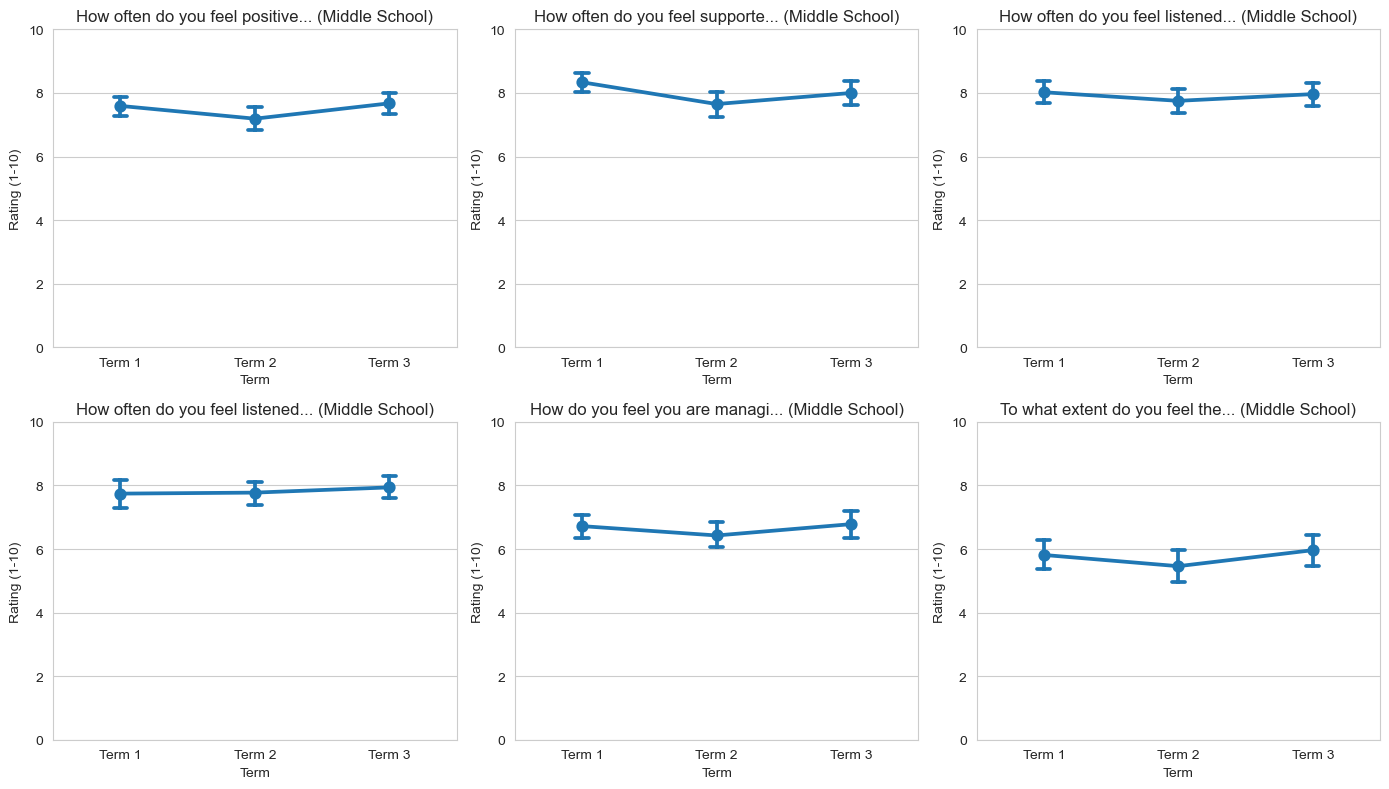

ANOVA RESULTS ACROSS TERMS


,Metric,F-value,p-value,Effect Size (η²),Term 1 Mean ± SD,Term 2 Mean ± SD,Term 3 Mean ± SD,Significant
0,How often do you feel positive in school,2.34,0.0986,0.018,7.59 ± 1.47,7.19 ± 1.71,7.67 ± 1.55,No
1,How often do you feel supported by your teache...,3.48,0.0323,0.027,8.34 ± 1.50,7.65 ± 1.82,8.00 ± 1.81,Yes
2,How often do you feel listened to by your teac...,0.56,0.5706,0.004,8.02 ± 1.64,7.75 ± 1.86,7.96 ± 1.81,No
3,How often do you feel listened to and supporte...,0.28,0.7597,0.002,7.74 ± 2.07,7.78 ± 1.74,7.94 ± 1.68,No
4,How do you feel you are managing the workload,0.87,0.4216,0.007,6.72 ± 1.71,6.43 ± 2.02,6.78 ± 1.98,No
5,To what extent do you feel the workload is mak...,1.10,0.3351,0.009,5.81 ± 2.22,5.46 ± 2.41,5.96 ± 2.25,No



================ HIGH SCHOOL ================

DESCRIPTIVE STATISTICS BY TERM


,count Term 1,count Term 2,count Term 3,mean Term 1,mean Term 2,mean Term 3,std Term 1,std Term 2,std Term 3,min Term 1,min Term 2,min Term 3,25% Term 1,25% Term 2,25% Term 3,50% Term 1,50% Term 2,50% Term 3,75% Term 1,75% Term 2,75% Term 3,max Term 1,max Term 2,max Term 3
Variable,,,,,,,,,,,,,,,,,,,,,,,,
How_do_you_feel_you_are_managing_the_workload,87.00,80.00,39.00,6.74,6.54,7.49,1.85,1.84,1.71,2.00,1.00,2.00,5.00,5.00,7.00,7.00,6.50,8.00,8.00,8.00,8.50,10.00,10.00,10.00
How_often_do_you_feel_listened_to_and_supported_by_your_friends,87.00,80.00,39.00,8.06,8.18,8.36,1.73,1.42,1.37,2.00,4.00,4.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,87.00,80.00,39.00,8.10,8.21,8.23,1.47,1.32,1.25,3.00,4.00,5.00,7.00,8.00,8.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_positive_in_school,87.00,80.00,39.00,7.14,7.40,8.26,1.68,1.45,1.14,2.00,3.00,5.00,6.00,6.00,8.00,7.00,8.00,8.00,8.00,8.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_supported_by_your_teachers_and_advisors,87.00,80.00,39.00,7.90,8.25,8.18,1.49,1.35,1.37,4.00,4.00,5.00,7.00,7.75,8.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,87.00,80.00,39.00,5.64,5.90,6.36,2.56,2.28,2.48,1.00,1.00,2.00,4.00,4.00,4.00,5.00,6.00,7.00,8.00,8.00,9.00,10.00,10.00,10.00


SUMMARY STATISTICS COMPARISON


,count - How_do_you_feel_you_are_managing_the_workload,count - How_often_do_you_feel_listened_to_and_supported_by_your_friends,count - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,count - How_often_do_you_feel_positive_in_school,count - How_often_do_you_feel_supported_by_your_teachers_and_advisors,count - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,mean - How_do_you_feel_you_are_managing_the_workload,mean - How_often_do_you_feel_listened_to_and_supported_by_your_friends,mean - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,mean - How_often_do_you_feel_positive_in_school,mean - How_often_do_you_feel_supported_by_your_teachers_and_advisors,mean - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,std - How_do_you_feel_you_are_managing_the_workload,std - How_often_do_you_feel_listened_to_and_supported_by_your_friends,std - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,std - How_often_do_you_feel_positive_in_school,std - How_often_do_you_feel_supported_by_your_teachers_and_advisors,std - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed
Term,,,,,,,,,,,,,,,,,,
Term 1,87,87,87,87,87,87,6.74,8.06,8.10,7.14,7.90,5.64,1.85,1.73,1.47,1.68,1.49,2.56
Term 2,80,80,80,80,80,80,6.54,8.18,8.21,7.40,8.25,5.90,1.84,1.42,1.32,1.45,1.35,2.28
Term 3,39,39,39,39,39,39,7.49,8.36,8.23,8.26,8.18,6.36,1.71,1.37,1.25,1.14,1.37,2.48


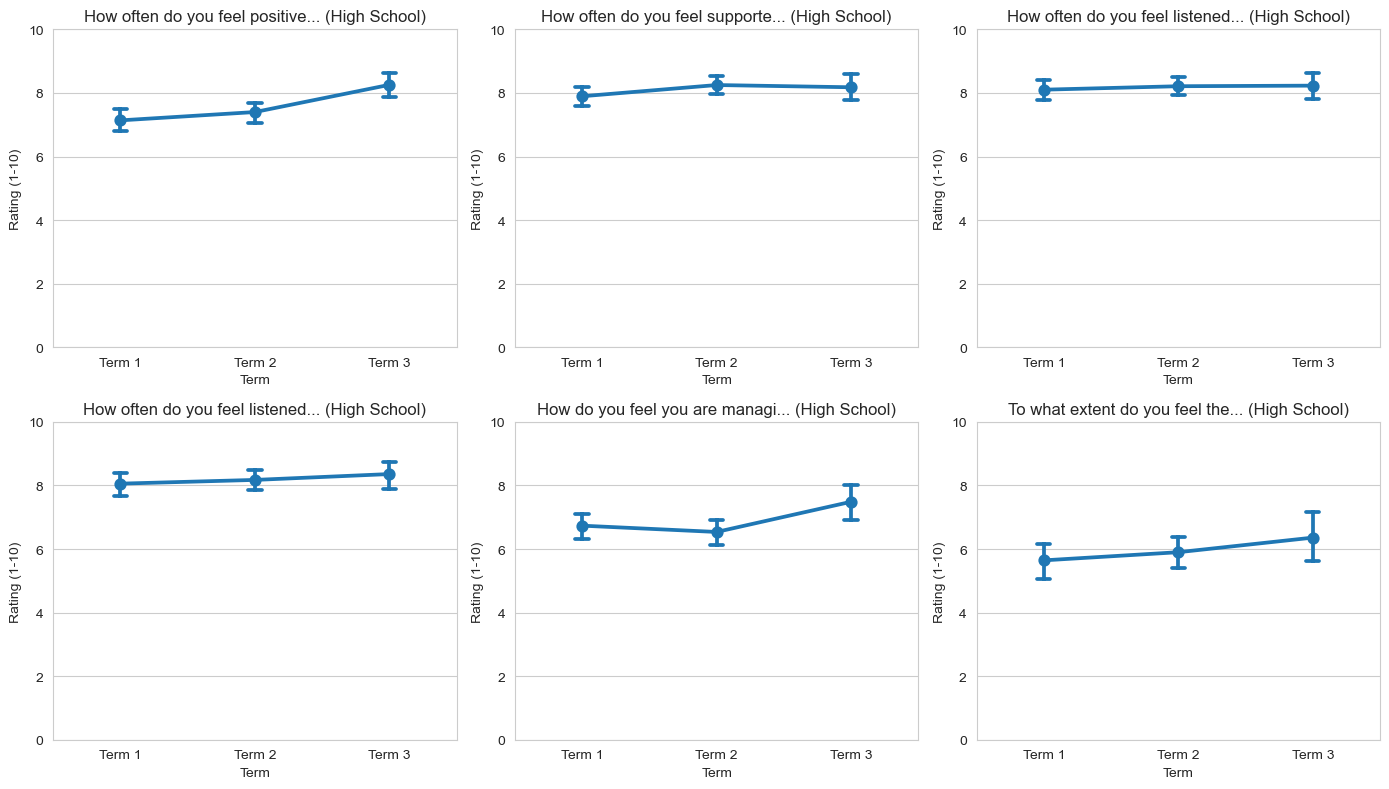

ANOVA RESULTS ACROSS TERMS


,Metric,F-value,p-value,Effect Size (η²),Term 1 Mean ± SD,Term 2 Mean ± SD,Term 3 Mean ± SD,Significant
0,How often do you feel positive in school,7.56,0.0007,0.069,7.14 ± 1.68,7.40 ± 1.45,8.26 ± 1.14,Yes
1,How often do you feel supported by your teache...,1.40,0.2488,0.014,7.90 ± 1.49,8.25 ± 1.35,8.18 ± 1.37,No
2,How often do you feel listened to by your teac...,0.18,0.8363,0.002,8.10 ± 1.47,8.21 ± 1.32,8.23 ± 1.25,No
3,How often do you feel listened to and supporte...,0.52,0.5977,0.005,8.06 ± 1.73,8.18 ± 1.42,8.36 ± 1.37,No
4,How do you feel you are managing the workload,3.65,0.0276,0.035,6.74 ± 1.85,6.54 ± 1.84,7.49 ± 1.71,Yes
5,To what extent do you feel the workload is mak...,1.16,0.3142,0.011,5.64 ± 2.56,5.90 ± 2.28,6.36 ± 2.48,No



✅ Analysis complete for both Middle and High School groups.


In [24]:
# -------------------------------------
# IMPORTS
# -------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from scipy import stats
from IPython.display import display

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set_style("whitegrid")

# -------------------------------------
# LOAD DATA
# -------------------------------------
file_path = "D:/Wellbeing Survey Project/comined_terms.xlsx"
try:
    df = pd.read_excel(file_path, sheet_name='Sheet1')
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    raise

# Clean column names
df.columns = [col.replace('?', '').replace(' ', '_').strip() for col in df.columns]

# -------------------------------------
# PREPARE DATA
# -------------------------------------
target_columns = [
    'How_often_do_you_feel_positive_in_school',
    'How_often_do_you_feel_supported_by_your_teachers_and_advisors',
    'How_often_do_you_feel_listened_to_by_your_teachers_and_advisors',
    'How_often_do_you_feel_listened_to_and_supported_by_your_friends',
    'How_do_you_feel_you_are_managing_the_workload',
    'To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed'
]

terms_df = df[df['Term'].isin(['Term 1', 'Term 2', 'Term 3'])].copy()
terms_df['Term'] = pd.Categorical(terms_df['Term'], categories=['Term 1', 'Term 2', 'Term 3'], ordered=True)
clean_df = terms_df.dropna(subset=target_columns)

school_levels = ['Middle School', 'High School']

# -------------------------------------
# FUNCTIONS
# -------------------------------------
def create_descriptive_table(data, columns, group_by='Term'):
    stats_list = []
    for term in ['Term 1', 'Term 2', 'Term 3']:
        term_data = data[data[group_by] == term][columns]
        stats = term_data.describe().T
        stats['Term'] = term
        stats_list.append(stats)
    all_stats = pd.concat(stats_list)
    stats_to_show = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    all_stats = all_stats[stats_to_show + ['Term']]
    all_stats.reset_index(inplace=True)
    all_stats.rename(columns={'index': 'Variable'}, inplace=True)
    for col in stats_to_show:
        all_stats[col] = all_stats[col].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)
    pivot_df = all_stats.pivot(index='Variable', columns='Term', values=stats_to_show)
    pivot_df.columns = [f"{stat} {term}" for stat, term in pivot_df.columns]
    return pivot_df

def create_summary_table(data, columns, group_by='Term'):
    summary = data.groupby(group_by, observed=True)[columns].agg(['mean', 'std', 'count'])
    summary = summary.swaplevel(axis=1).sort_index(axis=1, level=0)
    for stat in ['mean', 'std']:
        for col in columns:
            summary[(stat, col)] = summary[(stat, col)].map('{:.2f}'.format)
    summary.columns = [f"{stat} - {col}" for stat, col in summary.columns]
    return summary

# -------------------------------------
# ANALYSIS BY SCHOOL LEVEL
# -------------------------------------
for level in school_levels:
    print(f"\n================ {level.upper()} ================\n")
    level_df = clean_df[clean_df['SchoolLevel'] == level]

    # 1️⃣ DESCRIPTIVE TABLE
    print("DESCRIPTIVE STATISTICS BY TERM")
    desc_table = create_descriptive_table(level_df, target_columns)
    display(desc_table)

    # 2️⃣ SUMMARY TABLE
    print("SUMMARY STATISTICS COMPARISON")
    summary_table = create_summary_table(level_df, target_columns)
    display(summary_table)

    # 3️⃣ VISUALIZATION
    plt.figure(figsize=(14, 8))
    for i, col in enumerate(target_columns, 1):
        plt.subplot(2, 3, i)
        sns.pointplot(x='Term', y=col, data=level_df, errorbar=('ci', 95), capsize=0.1)
        plt.title(f"{col.replace('_', ' ')[:30]}{'...' if len(col) > 30 else ''} ({level})")
        plt.ylim(0, 10)
        plt.ylabel('Rating (1-10)')
    plt.tight_layout()
    plt.show()

    # 4️⃣ ANOVA RESULTS
    print("ANOVA RESULTS ACROSS TERMS")
    results = []
    for col in target_columns:
        term_groups = [level_df[level_df['Term'] == term][col] for term in ['Term 1', 'Term 2', 'Term 3']]
        f_val, p_val = stats.f_oneway(*term_groups)
        eta_sq = f_val * (len(term_groups)-1) / (f_val * (len(term_groups)-1) + (len(level_df)-len(term_groups)))
        results.append({
            'Metric': col.replace('_', ' '),
            'F-value': f"{f_val:.2f}",
            'p-value': f"{p_val:.4f}",
            'Effect Size (η²)': f"{eta_sq:.3f}",
            'Term 1 Mean ± SD': f"{term_groups[0].mean():.2f} ± {term_groups[0].std():.2f}",
            'Term 2 Mean ± SD': f"{term_groups[1].mean():.2f} ± {term_groups[1].std():.2f}",
            'Term 3 Mean ± SD': f"{term_groups[2].mean():.2f} ± {term_groups[2].std():.2f}",
            'Significant': "Yes" if p_val < 0.05 else "No"
        })
    results_df = pd.DataFrame(results)
    display(results_df)

print("\n✅ Analysis complete for both Middle and High School groups.")



================ MIDDLE SCHOOL ================

DESCRIPTIVE STATISTICS BY TERM


,Term 1 count,Term 2 count,Term 3 count,Term 1 mean,Term 2 mean,Term 3 mean,Term 1 std,Term 2 std,Term 3 std,Term 1 min,Term 2 min,Term 3 min,Term 1 25%,Term 2 25%,Term 3 25%,Term 1 50%,Term 2 50%,Term 3 50%,Term 1 75%,Term 2 75%,Term 3 75%,Term 1 max,Term 2 max,Term 3 max
Variable,,,,,,,,,,,,,,,,,,,,,,,,
How_do_you_feel_you_are_managing_the_workload,86.00,89.00,83.00,6.72,6.43,6.78,1.71,2.02,1.98,2.00,2.00,1.00,6.00,5.00,6.00,7.00,7.00,7.00,8.00,8.00,8.00,10.00,10.00,10.00
How_often_do_you_feel_listened_to_and_supported_by_your_friends,86.00,89.00,83.00,7.74,7.78,7.94,2.07,1.74,1.68,1.00,1.00,1.00,7.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,86.00,89.00,83.00,8.02,7.75,7.96,1.64,1.86,1.81,3.00,3.00,1.00,7.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_positive_in_school,86.00,89.00,83.00,7.59,7.19,7.67,1.47,1.71,1.55,3.00,1.00,1.00,7.00,6.00,7.00,8.00,8.00,8.00,9.00,8.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_supported_by_your_teachers_and_advisors,86.00,89.00,83.00,8.34,7.65,8.00,1.50,1.82,1.81,2.00,2.00,1.00,8.00,7.00,7.00,8.00,8.00,8.00,10.00,9.00,9.00,10.00,10.00,10.00
To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,86.00,89.00,83.00,5.81,5.46,5.96,2.22,2.41,2.25,1.00,1.00,1.00,4.00,4.00,4.00,6.00,5.00,6.00,7.75,8.00,8.00,10.00,10.00,10.00


SUMMARY STATISTICS COMPARISON


,count - How_do_you_feel_you_are_managing_the_workload,count - How_often_do_you_feel_listened_to_and_supported_by_your_friends,count - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,count - How_often_do_you_feel_positive_in_school,count - How_often_do_you_feel_supported_by_your_teachers_and_advisors,count - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,mean - How_do_you_feel_you_are_managing_the_workload,mean - How_often_do_you_feel_listened_to_and_supported_by_your_friends,mean - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,mean - How_often_do_you_feel_positive_in_school,mean - How_often_do_you_feel_supported_by_your_teachers_and_advisors,mean - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,std - How_do_you_feel_you_are_managing_the_workload,std - How_often_do_you_feel_listened_to_and_supported_by_your_friends,std - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,std - How_often_do_you_feel_positive_in_school,std - How_often_do_you_feel_supported_by_your_teachers_and_advisors,std - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed
Term,,,,,,,,,,,,,,,,,,
Term 1,86,86,86,86,86,86,6.72,7.74,8.02,7.59,8.34,5.81,1.71,2.07,1.64,1.47,1.50,2.22
Term 2,89,89,89,89,89,89,6.43,7.78,7.75,7.19,7.65,5.46,2.02,1.74,1.86,1.71,1.82,2.41
Term 3,83,83,83,83,83,83,6.78,7.94,7.96,7.67,8.00,5.96,1.98,1.68,1.81,1.55,1.81,2.25


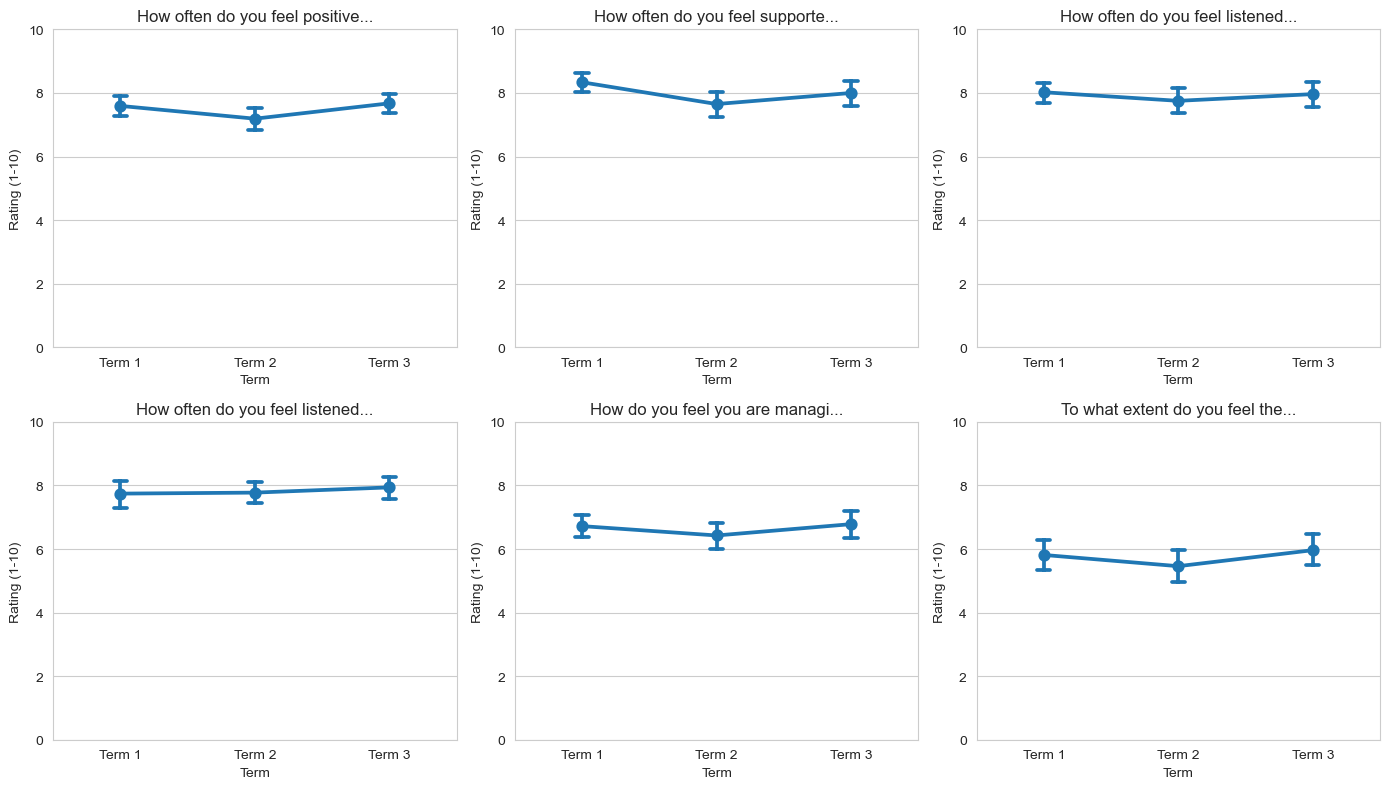

✅ Chart saved to Wellbeing_Charts/Middle_School_Wellbeing_Term_Comparison.png
ANOVA RESULTS ACROSS TERMS


,Metric,F-value,p-value,Effect Size (η²),Term 1 Mean ± SD,Term 2 Mean ± SD,Term 3 Mean ± SD,Significant
0,How often do you feel positive in school,2.34,0.0986,0.018,7.59 ± 1.47,7.19 ± 1.71,7.67 ± 1.55,No
1,How often do you feel supported by your teache...,3.48,0.0323,0.027,8.34 ± 1.50,7.65 ± 1.82,8.00 ± 1.81,Yes
2,How often do you feel listened to by your teac...,0.56,0.5706,0.004,8.02 ± 1.64,7.75 ± 1.86,7.96 ± 1.81,No
3,How often do you feel listened to and supporte...,0.28,0.7597,0.002,7.74 ± 2.07,7.78 ± 1.74,7.94 ± 1.68,No
4,How do you feel you are managing the workload,0.87,0.4216,0.007,6.72 ± 1.71,6.43 ± 2.02,6.78 ± 1.98,No
5,To what extent do you feel the workload is mak...,1.10,0.3351,0.009,5.81 ± 2.22,5.46 ± 2.41,5.96 ± 2.25,No



================ HIGH SCHOOL ================

DESCRIPTIVE STATISTICS BY TERM


,Term 1 count,Term 2 count,Term 3 count,Term 1 mean,Term 2 mean,Term 3 mean,Term 1 std,Term 2 std,Term 3 std,Term 1 min,Term 2 min,Term 3 min,Term 1 25%,Term 2 25%,Term 3 25%,Term 1 50%,Term 2 50%,Term 3 50%,Term 1 75%,Term 2 75%,Term 3 75%,Term 1 max,Term 2 max,Term 3 max
Variable,,,,,,,,,,,,,,,,,,,,,,,,
How_do_you_feel_you_are_managing_the_workload,87.00,80.00,39.00,6.74,6.54,7.49,1.85,1.84,1.71,2.00,1.00,2.00,5.00,5.00,7.00,7.00,6.50,8.00,8.00,8.00,8.50,10.00,10.00,10.00
How_often_do_you_feel_listened_to_and_supported_by_your_friends,87.00,80.00,39.00,8.06,8.18,8.36,1.73,1.42,1.37,2.00,4.00,4.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,87.00,80.00,39.00,8.10,8.21,8.23,1.47,1.32,1.25,3.00,4.00,5.00,7.00,8.00,8.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_positive_in_school,87.00,80.00,39.00,7.14,7.40,8.26,1.68,1.45,1.14,2.00,3.00,5.00,6.00,6.00,8.00,7.00,8.00,8.00,8.00,8.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_supported_by_your_teachers_and_advisors,87.00,80.00,39.00,7.90,8.25,8.18,1.49,1.35,1.37,4.00,4.00,5.00,7.00,7.75,8.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,87.00,80.00,39.00,5.64,5.90,6.36,2.56,2.28,2.48,1.00,1.00,2.00,4.00,4.00,4.00,5.00,6.00,7.00,8.00,8.00,9.00,10.00,10.00,10.00


SUMMARY STATISTICS COMPARISON


,count - How_do_you_feel_you_are_managing_the_workload,count - How_often_do_you_feel_listened_to_and_supported_by_your_friends,count - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,count - How_often_do_you_feel_positive_in_school,count - How_often_do_you_feel_supported_by_your_teachers_and_advisors,count - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,mean - How_do_you_feel_you_are_managing_the_workload,mean - How_often_do_you_feel_listened_to_and_supported_by_your_friends,mean - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,mean - How_often_do_you_feel_positive_in_school,mean - How_often_do_you_feel_supported_by_your_teachers_and_advisors,mean - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,std - How_do_you_feel_you_are_managing_the_workload,std - How_often_do_you_feel_listened_to_and_supported_by_your_friends,std - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,std - How_often_do_you_feel_positive_in_school,std - How_often_do_you_feel_supported_by_your_teachers_and_advisors,std - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed
Term,,,,,,,,,,,,,,,,,,
Term 1,87,87,87,87,87,87,6.74,8.06,8.10,7.14,7.90,5.64,1.85,1.73,1.47,1.68,1.49,2.56
Term 2,80,80,80,80,80,80,6.54,8.18,8.21,7.40,8.25,5.90,1.84,1.42,1.32,1.45,1.35,2.28
Term 3,39,39,39,39,39,39,7.49,8.36,8.23,8.26,8.18,6.36,1.71,1.37,1.25,1.14,1.37,2.48


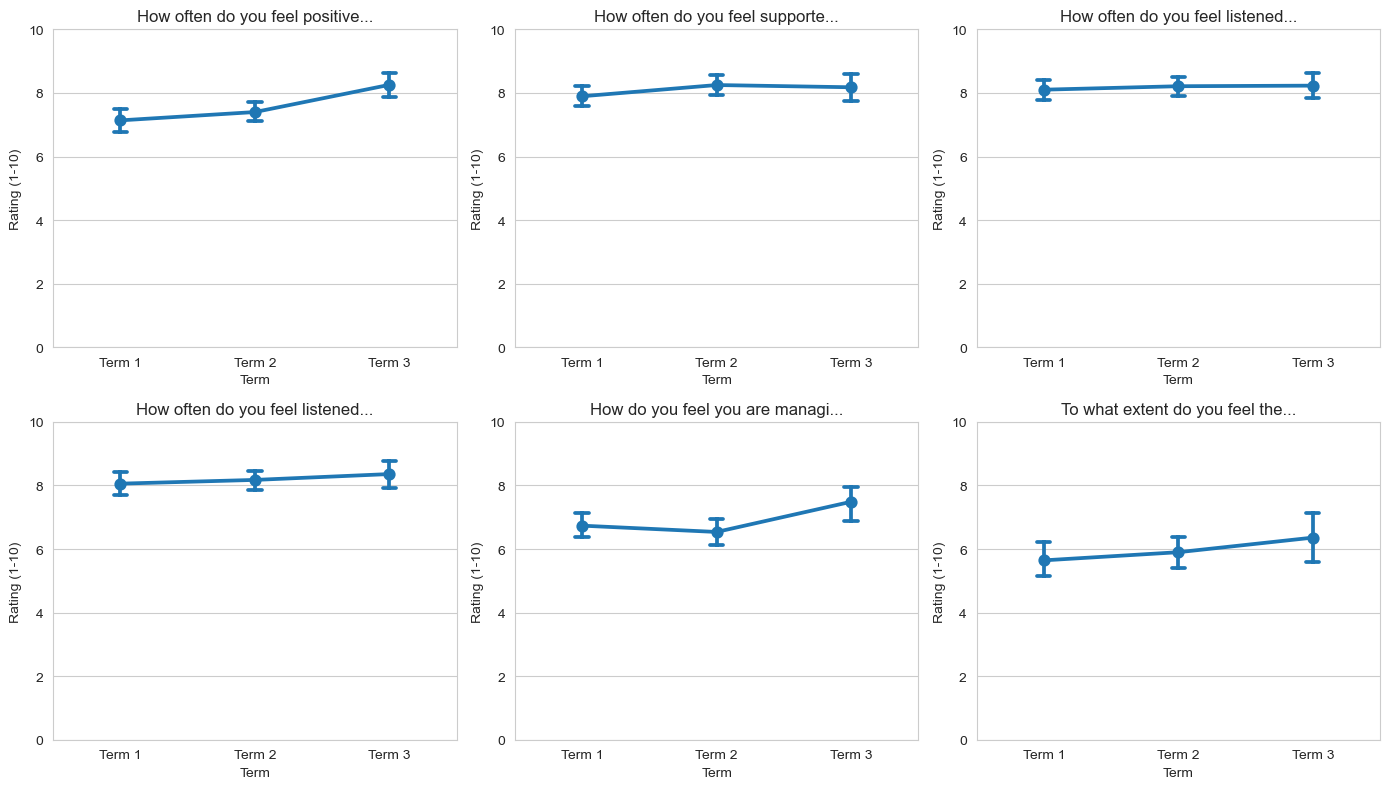

✅ Chart saved to Wellbeing_Charts/High_School_Wellbeing_Term_Comparison.png
ANOVA RESULTS ACROSS TERMS


,Metric,F-value,p-value,Effect Size (η²),Term 1 Mean ± SD,Term 2 Mean ± SD,Term 3 Mean ± SD,Significant
0,How often do you feel positive in school,7.56,0.0007,0.069,7.14 ± 1.68,7.40 ± 1.45,8.26 ± 1.14,Yes
1,How often do you feel supported by your teache...,1.40,0.2488,0.014,7.90 ± 1.49,8.25 ± 1.35,8.18 ± 1.37,No
2,How often do you feel listened to by your teac...,0.18,0.8363,0.002,8.10 ± 1.47,8.21 ± 1.32,8.23 ± 1.25,No
3,How often do you feel listened to and supporte...,0.52,0.5977,0.005,8.06 ± 1.73,8.18 ± 1.42,8.36 ± 1.37,No
4,How do you feel you are managing the workload,3.65,0.0276,0.035,6.74 ± 1.85,6.54 ± 1.84,7.49 ± 1.71,Yes
5,To what extent do you feel the workload is mak...,1.16,0.3142,0.011,5.64 ± 2.56,5.90 ± 2.28,6.36 ± 2.48,No



✅ Analysis complete for both Middle and High School groups.


In [26]:
# -----------------------------------------
# IMPORTS
# -----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from IPython.display import display

# -----------------------------------------
# SETTINGS
# -----------------------------------------
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set_style("whitegrid")

# -----------------------------------------
# LOAD DATA
# -----------------------------------------
file_path = "D:/Wellbeing Survey Project/comined_terms.xlsx"

try:
    df = pd.read_excel(file_path, sheet_name='Sheet1')
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    raise

# -----------------------------------------
# CLEAN COLUMN NAMES
# -----------------------------------------
df.columns = [col.replace('?', '').replace(' ', '_').strip() for col in df.columns]

# -----------------------------------------
# FILTER DATA
# -----------------------------------------
target_columns = [
    'How_often_do_you_feel_positive_in_school',
    'How_often_do_you_feel_supported_by_your_teachers_and_advisors',
    'How_often_do_you_feel_listened_to_by_your_teachers_and_advisors',
    'How_often_do_you_feel_listened_to_and_supported_by_your_friends',
    'How_do_you_feel_you_are_managing_the_workload',
    'To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed'
]

terms_df = df[df['Term'].isin(['Term 1', 'Term 2', 'Term 3'])].copy()
terms_df['Term'] = pd.Categorical(terms_df['Term'], categories=['Term 1', 'Term 2', 'Term 3'], ordered=True)
clean_df = terms_df.dropna(subset=target_columns)

# -----------------------------------------
# FUNCTIONS
# -----------------------------------------
def create_descriptive_table(data, columns, group_by='Term'):
    stats_list = []
    for term in ['Term 1', 'Term 2', 'Term 3']:
        term_data = data[data[group_by] == term][columns]
        stats = term_data.describe().T
        stats['Term'] = term
        stats_list.append(stats)
    all_stats = pd.concat(stats_list)
    stats_to_show = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    all_stats = all_stats[stats_to_show + ['Term']]
    all_stats.reset_index(inplace=True)
    all_stats.rename(columns={'index': 'Variable'}, inplace=True)
    for col in stats_to_show:
        all_stats[col] = all_stats[col].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)
    pivot_df = all_stats.pivot(index='Variable', columns='Term', values=stats_to_show)
    pivot_df.columns = [f"{stat} {term}" for term, stat in pivot_df.columns]
    return pivot_df

def create_summary_table(data, columns, group_by='Term'):
    summary = data.groupby(group_by, observed=True)[columns].agg(['mean', 'std', 'count'])
    summary = summary.swaplevel(axis=1).sort_index(axis=1, level=0)
    for stat in ['mean', 'std']:
        for col in columns:
            summary[(stat, col)] = summary[(stat, col)].map('{:.2f}'.format)
    summary.columns = [f"{stat} - {col}" for stat, col in summary.columns]
    return summary

# -----------------------------------------
# ANALYSIS BY SCHOOL LEVEL
# -----------------------------------------
output_folder = "Wellbeing_Charts"
os.makedirs(output_folder, exist_ok=True)

for level in ['Middle School', 'High School']:
    print(f"\n================ {level.upper()} ================\n")
    level_df = clean_df[clean_df['SchoolLevel'] == level]

    # 1️⃣ DESCRIPTIVE TABLE
    print("DESCRIPTIVE STATISTICS BY TERM")
    desc_table = create_descriptive_table(level_df, target_columns)
    display(desc_table)

    # 2️⃣ SUMMARY TABLE
    print("SUMMARY STATISTICS COMPARISON")
    summary_table = create_summary_table(level_df, target_columns)
    display(summary_table)

    # 3️⃣ VISUALIZATION AND SAVE
    plt.figure(figsize=(14, 8))
    for i, col in enumerate(target_columns, 1):
        plt.subplot(2, 3, i)
        sns.pointplot(x='Term', y=col, data=level_df, errorbar=('ci', 95), capsize=0.1)
        plt.title(col.replace('_', ' ')[:30] + ('...' if len(col) > 30 else ''))
        plt.ylim(0, 10)
        plt.ylabel('Rating (1-10)')
    plt.tight_layout()
    filename = f"{output_folder}/{level.replace(' ', '_')}_Wellbeing_Term_Comparison.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Chart saved to {filename}")

    # 4️⃣ ANOVA
    results = []
    for col in target_columns:
        term_groups = [level_df[level_df['Term'] == term][col] for term in ['Term 1', 'Term 2', 'Term 3']]
        f_val, p_val = stats.f_oneway(*term_groups)
        eta_sq = f_val * (len(term_groups)-1) / (f_val * (len(term_groups)-1) + (len(level_df)-len(term_groups)))
        results.append({
            'Metric': col.replace('_', ' '),
            'F-value': f"{f_val:.2f}",
            'p-value': f"{p_val:.4f}",
            'Effect Size (η²)': f"{eta_sq:.3f}",
            'Term 1 Mean ± SD': f"{term_groups[0].mean():.2f} ± {term_groups[0].std():.2f}",
            'Term 2 Mean ± SD': f"{term_groups[1].mean():.2f} ± {term_groups[1].std():.2f}",
            'Term 3 Mean ± SD': f"{term_groups[2].mean():.2f} ± {term_groups[2].std():.2f}",
            'Significant': "Yes" if p_val < 0.05 else "No"
        })

    results_df = pd.DataFrame(results)
    print("ANOVA RESULTS ACROSS TERMS")
    display(results_df)

print("\n✅ Analysis complete for both Middle and High School groups.")



================ WHOLE SCHOOL ================

DESCRIPTIVE STATISTICS BY TERM


,Term 1 count,Term 2 count,Term 3 count,Term 1 mean,Term 2 mean,Term 3 mean,Term 1 std,Term 2 std,Term 3 std,Term 1 min,Term 2 min,Term 3 min,Term 1 25%,Term 2 25%,Term 3 25%,Term 1 50%,Term 2 50%,Term 3 50%,Term 1 75%,Term 2 75%,Term 3 75%,Term 1 max,Term 2 max,Term 3 max
Variable,,,,,,,,,,,,,,,,,,,,,,,,
How_do_you_feel_you_are_managing_the_workload,173.00,169.00,122.00,6.73,6.48,7.01,1.78,1.93,1.92,2.00,1.00,1.00,6.00,5.00,6.00,7.00,7.00,7.00,8.00,8.00,8.00,10.00,10.00,10.00
How_often_do_you_feel_listened_to_and_supported_by_your_friends,173.00,169.00,122.00,7.90,7.96,8.07,1.91,1.61,1.59,1.00,1.00,1.00,7.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,173.00,169.00,122.00,8.06,7.97,8.05,1.56,1.64,1.65,3.00,3.00,1.00,7.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_positive_in_school,173.00,169.00,122.00,7.36,7.29,7.86,1.59,1.59,1.45,2.00,1.00,1.00,7.00,6.00,7.00,8.00,8.00,8.00,8.00,8.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_supported_by_your_teachers_and_advisors,173.00,169.00,122.00,8.12,7.93,8.06,1.51,1.64,1.68,2.00,2.00,1.00,7.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,173.00,169.00,122.00,5.73,5.67,6.09,2.39,2.35,2.32,1.00,1.00,1.00,4.00,4.00,4.00,6.00,6.00,6.00,8.00,8.00,8.00,10.00,10.00,10.00


SUMMARY STATISTICS COMPARISON


,count - How_do_you_feel_you_are_managing_the_workload,count - How_often_do_you_feel_listened_to_and_supported_by_your_friends,count - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,count - How_often_do_you_feel_positive_in_school,count - How_often_do_you_feel_supported_by_your_teachers_and_advisors,count - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,mean - How_do_you_feel_you_are_managing_the_workload,mean - How_often_do_you_feel_listened_to_and_supported_by_your_friends,mean - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,mean - How_often_do_you_feel_positive_in_school,mean - How_often_do_you_feel_supported_by_your_teachers_and_advisors,mean - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,std - How_do_you_feel_you_are_managing_the_workload,std - How_often_do_you_feel_listened_to_and_supported_by_your_friends,std - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,std - How_often_do_you_feel_positive_in_school,std - How_often_do_you_feel_supported_by_your_teachers_and_advisors,std - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed
Term,,,,,,,,,,,,,,,,,,
Term 1,173,173,173,173,173,173,6.73,7.90,8.06,7.36,8.12,5.73,1.78,1.91,1.56,1.59,1.51,2.39
Term 2,169,169,169,169,169,169,6.48,7.96,7.97,7.29,7.93,5.67,1.93,1.61,1.64,1.59,1.64,2.35
Term 3,122,122,122,122,122,122,7.01,8.07,8.05,7.86,8.06,6.09,1.92,1.59,1.65,1.45,1.68,2.32


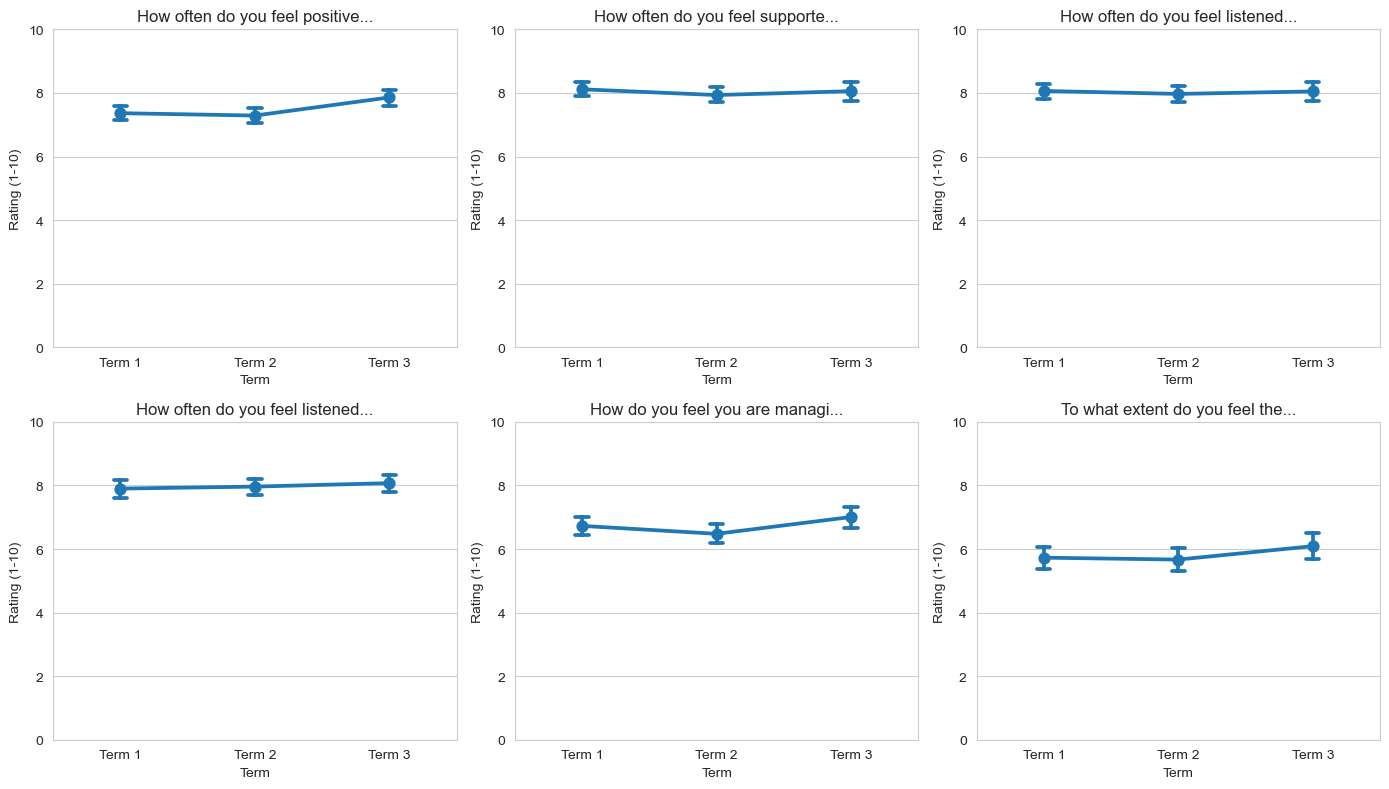

✅ Chart saved to D:/Wellbeing_Charts/Whole_School_Wellbeing_Term_Comparison.png
ANOVA RESULTS ACROSS TERMS


,Metric,F-value,p-value,Effect Size (η²),Term 1 Mean ± SD,Term 2 Mean ± SD,Term 3 Mean ± SD,Significant
0,How often do you feel positive in school,5.39,0.0049,0.023,7.36 ± 1.59,7.29 ± 1.59,7.86 ± 1.45,Yes
1,How often do you feel supported by your teache...,0.56,0.5716,0.002,8.12 ± 1.51,7.93 ± 1.64,8.06 ± 1.68,No
2,How often do you feel listened to by your teac...,0.16,0.8520,0.001,8.06 ± 1.56,7.97 ± 1.64,8.05 ± 1.65,No
3,How often do you feel listened to and supporte...,0.36,0.6988,0.002,7.90 ± 1.91,7.96 ± 1.61,8.07 ± 1.59,No
4,How do you feel you are managing the workload,2.84,0.0595,0.012,6.73 ± 1.78,6.48 ± 1.93,7.01 ± 1.92,No
5,To what extent do you feel the workload is mak...,1.27,0.2831,0.005,5.73 ± 2.39,5.67 ± 2.35,6.09 ± 2.32,No



================ MIDDLE SCHOOL ================

DESCRIPTIVE STATISTICS BY TERM


,Term 1 count,Term 2 count,Term 3 count,Term 1 mean,Term 2 mean,Term 3 mean,Term 1 std,Term 2 std,Term 3 std,Term 1 min,Term 2 min,Term 3 min,Term 1 25%,Term 2 25%,Term 3 25%,Term 1 50%,Term 2 50%,Term 3 50%,Term 1 75%,Term 2 75%,Term 3 75%,Term 1 max,Term 2 max,Term 3 max
Variable,,,,,,,,,,,,,,,,,,,,,,,,
How_do_you_feel_you_are_managing_the_workload,86.00,89.00,83.00,6.72,6.43,6.78,1.71,2.02,1.98,2.00,2.00,1.00,6.00,5.00,6.00,7.00,7.00,7.00,8.00,8.00,8.00,10.00,10.00,10.00
How_often_do_you_feel_listened_to_and_supported_by_your_friends,86.00,89.00,83.00,7.74,7.78,7.94,2.07,1.74,1.68,1.00,1.00,1.00,7.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,86.00,89.00,83.00,8.02,7.75,7.96,1.64,1.86,1.81,3.00,3.00,1.00,7.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_positive_in_school,86.00,89.00,83.00,7.59,7.19,7.67,1.47,1.71,1.55,3.00,1.00,1.00,7.00,6.00,7.00,8.00,8.00,8.00,9.00,8.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_supported_by_your_teachers_and_advisors,86.00,89.00,83.00,8.34,7.65,8.00,1.50,1.82,1.81,2.00,2.00,1.00,8.00,7.00,7.00,8.00,8.00,8.00,10.00,9.00,9.00,10.00,10.00,10.00
To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,86.00,89.00,83.00,5.81,5.46,5.96,2.22,2.41,2.25,1.00,1.00,1.00,4.00,4.00,4.00,6.00,5.00,6.00,7.75,8.00,8.00,10.00,10.00,10.00


SUMMARY STATISTICS COMPARISON


,count - How_do_you_feel_you_are_managing_the_workload,count - How_often_do_you_feel_listened_to_and_supported_by_your_friends,count - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,count - How_often_do_you_feel_positive_in_school,count - How_often_do_you_feel_supported_by_your_teachers_and_advisors,count - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,mean - How_do_you_feel_you_are_managing_the_workload,mean - How_often_do_you_feel_listened_to_and_supported_by_your_friends,mean - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,mean - How_often_do_you_feel_positive_in_school,mean - How_often_do_you_feel_supported_by_your_teachers_and_advisors,mean - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,std - How_do_you_feel_you_are_managing_the_workload,std - How_often_do_you_feel_listened_to_and_supported_by_your_friends,std - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,std - How_often_do_you_feel_positive_in_school,std - How_often_do_you_feel_supported_by_your_teachers_and_advisors,std - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed
Term,,,,,,,,,,,,,,,,,,
Term 1,86,86,86,86,86,86,6.72,7.74,8.02,7.59,8.34,5.81,1.71,2.07,1.64,1.47,1.50,2.22
Term 2,89,89,89,89,89,89,6.43,7.78,7.75,7.19,7.65,5.46,2.02,1.74,1.86,1.71,1.82,2.41
Term 3,83,83,83,83,83,83,6.78,7.94,7.96,7.67,8.00,5.96,1.98,1.68,1.81,1.55,1.81,2.25


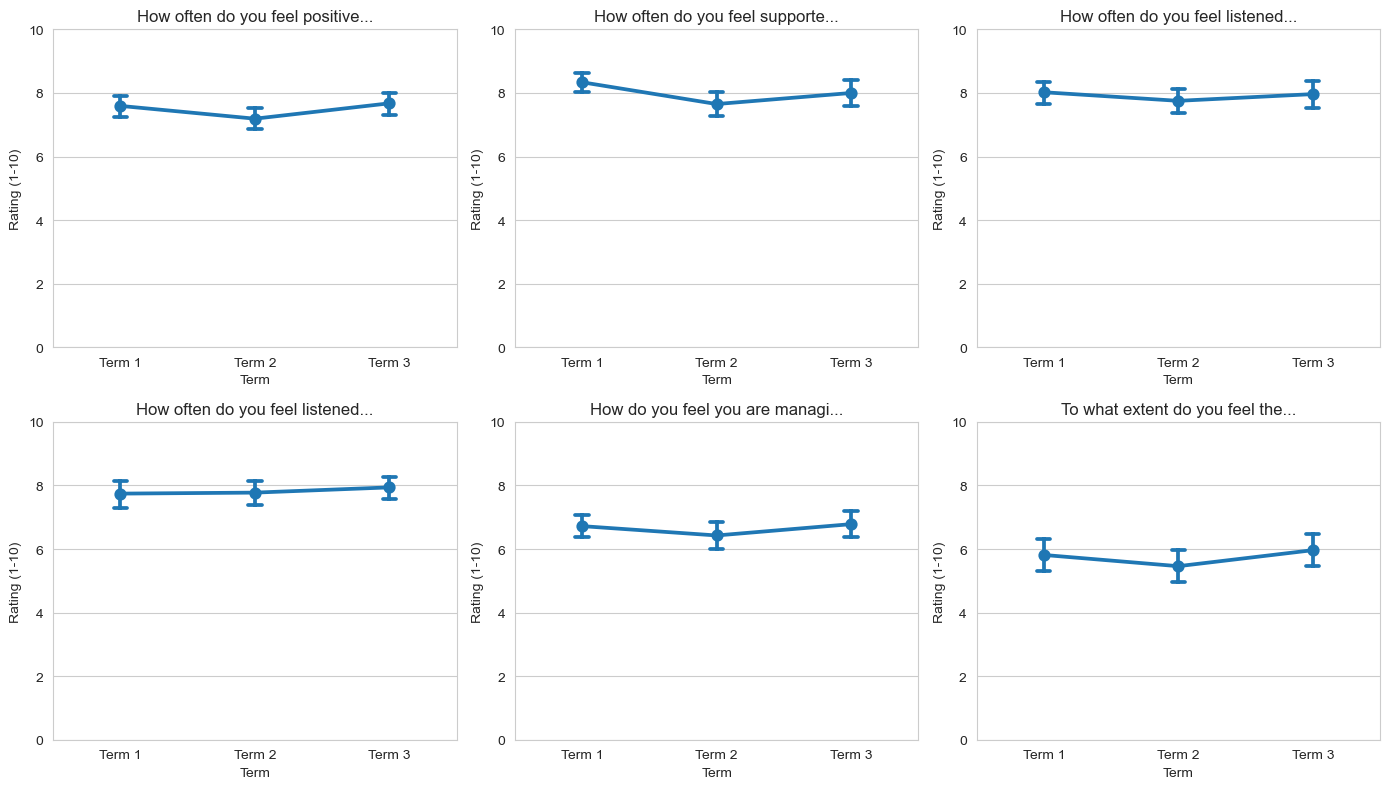

✅ Chart saved to D:/Wellbeing_Charts/Middle_School_Wellbeing_Term_Comparison.png
ANOVA RESULTS ACROSS TERMS


,Metric,F-value,p-value,Effect Size (η²),Term 1 Mean ± SD,Term 2 Mean ± SD,Term 3 Mean ± SD,Significant
0,How often do you feel positive in school,2.34,0.0986,0.018,7.59 ± 1.47,7.19 ± 1.71,7.67 ± 1.55,No
1,How often do you feel supported by your teache...,3.48,0.0323,0.027,8.34 ± 1.50,7.65 ± 1.82,8.00 ± 1.81,Yes
2,How often do you feel listened to by your teac...,0.56,0.5706,0.004,8.02 ± 1.64,7.75 ± 1.86,7.96 ± 1.81,No
3,How often do you feel listened to and supporte...,0.28,0.7597,0.002,7.74 ± 2.07,7.78 ± 1.74,7.94 ± 1.68,No
4,How do you feel you are managing the workload,0.87,0.4216,0.007,6.72 ± 1.71,6.43 ± 2.02,6.78 ± 1.98,No
5,To what extent do you feel the workload is mak...,1.10,0.3351,0.009,5.81 ± 2.22,5.46 ± 2.41,5.96 ± 2.25,No



================ HIGH SCHOOL ================

DESCRIPTIVE STATISTICS BY TERM


,Term 1 count,Term 2 count,Term 3 count,Term 1 mean,Term 2 mean,Term 3 mean,Term 1 std,Term 2 std,Term 3 std,Term 1 min,Term 2 min,Term 3 min,Term 1 25%,Term 2 25%,Term 3 25%,Term 1 50%,Term 2 50%,Term 3 50%,Term 1 75%,Term 2 75%,Term 3 75%,Term 1 max,Term 2 max,Term 3 max
Variable,,,,,,,,,,,,,,,,,,,,,,,,
How_do_you_feel_you_are_managing_the_workload,87.00,80.00,39.00,6.74,6.54,7.49,1.85,1.84,1.71,2.00,1.00,2.00,5.00,5.00,7.00,7.00,6.50,8.00,8.00,8.00,8.50,10.00,10.00,10.00
How_often_do_you_feel_listened_to_and_supported_by_your_friends,87.00,80.00,39.00,8.06,8.18,8.36,1.73,1.42,1.37,2.00,4.00,4.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,87.00,80.00,39.00,8.10,8.21,8.23,1.47,1.32,1.25,3.00,4.00,5.00,7.00,8.00,8.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_positive_in_school,87.00,80.00,39.00,7.14,7.40,8.26,1.68,1.45,1.14,2.00,3.00,5.00,6.00,6.00,8.00,7.00,8.00,8.00,8.00,8.00,9.00,10.00,10.00,10.00
How_often_do_you_feel_supported_by_your_teachers_and_advisors,87.00,80.00,39.00,7.90,8.25,8.18,1.49,1.35,1.37,4.00,4.00,5.00,7.00,7.75,8.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00
To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,87.00,80.00,39.00,5.64,5.90,6.36,2.56,2.28,2.48,1.00,1.00,2.00,4.00,4.00,4.00,5.00,6.00,7.00,8.00,8.00,9.00,10.00,10.00,10.00


SUMMARY STATISTICS COMPARISON


,count - How_do_you_feel_you_are_managing_the_workload,count - How_often_do_you_feel_listened_to_and_supported_by_your_friends,count - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,count - How_often_do_you_feel_positive_in_school,count - How_often_do_you_feel_supported_by_your_teachers_and_advisors,count - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,mean - How_do_you_feel_you_are_managing_the_workload,mean - How_often_do_you_feel_listened_to_and_supported_by_your_friends,mean - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,mean - How_often_do_you_feel_positive_in_school,mean - How_often_do_you_feel_supported_by_your_teachers_and_advisors,mean - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed,std - How_do_you_feel_you_are_managing_the_workload,std - How_often_do_you_feel_listened_to_and_supported_by_your_friends,std - How_often_do_you_feel_listened_to_by_your_teachers_and_advisors,std - How_often_do_you_feel_positive_in_school,std - How_often_do_you_feel_supported_by_your_teachers_and_advisors,std - To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed
Term,,,,,,,,,,,,,,,,,,
Term 1,87,87,87,87,87,87,6.74,8.06,8.10,7.14,7.90,5.64,1.85,1.73,1.47,1.68,1.49,2.56
Term 2,80,80,80,80,80,80,6.54,8.18,8.21,7.40,8.25,5.90,1.84,1.42,1.32,1.45,1.35,2.28
Term 3,39,39,39,39,39,39,7.49,8.36,8.23,8.26,8.18,6.36,1.71,1.37,1.25,1.14,1.37,2.48


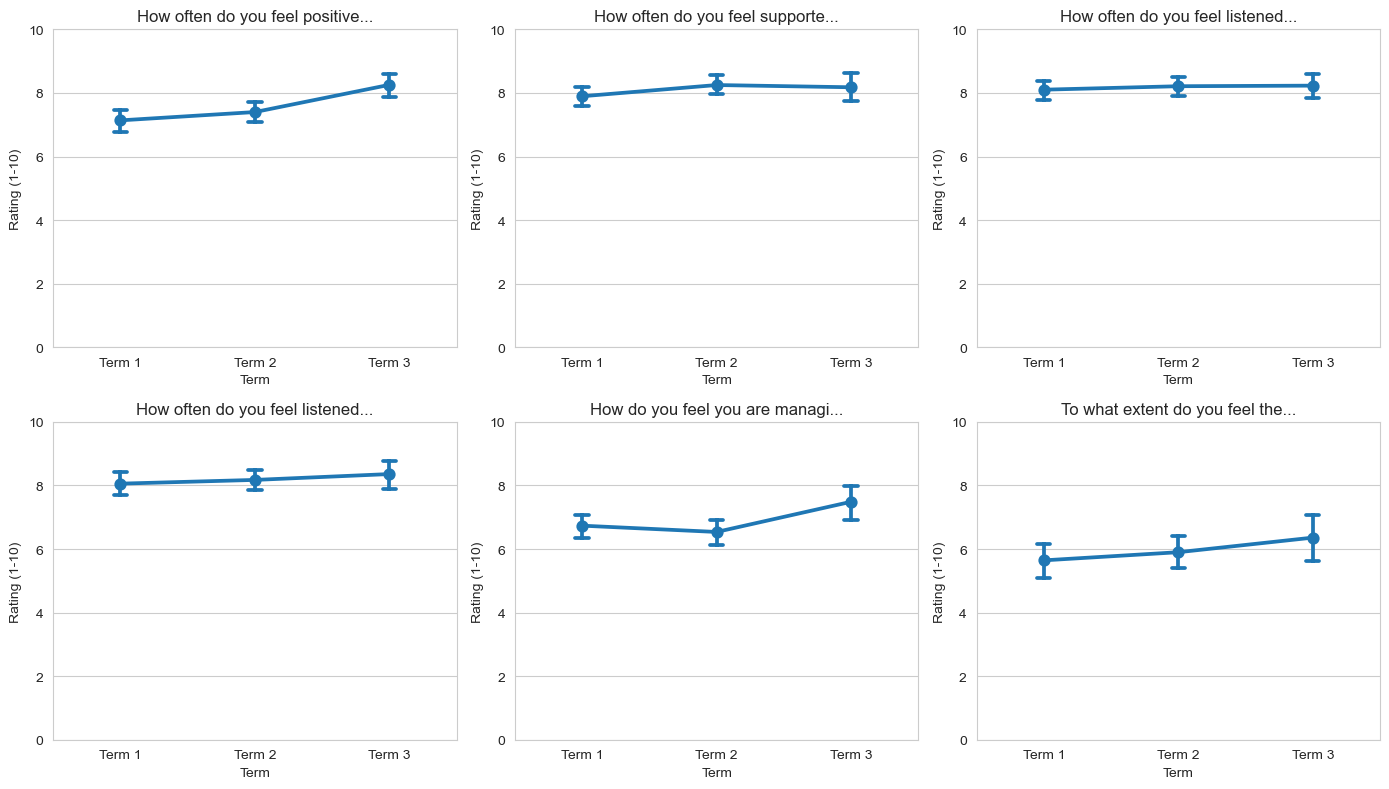

✅ Chart saved to D:/Wellbeing_Charts/High_School_Wellbeing_Term_Comparison.png
ANOVA RESULTS ACROSS TERMS


,Metric,F-value,p-value,Effect Size (η²),Term 1 Mean ± SD,Term 2 Mean ± SD,Term 3 Mean ± SD,Significant
0,How often do you feel positive in school,7.56,0.0007,0.069,7.14 ± 1.68,7.40 ± 1.45,8.26 ± 1.14,Yes
1,How often do you feel supported by your teache...,1.40,0.2488,0.014,7.90 ± 1.49,8.25 ± 1.35,8.18 ± 1.37,No
2,How often do you feel listened to by your teac...,0.18,0.8363,0.002,8.10 ± 1.47,8.21 ± 1.32,8.23 ± 1.25,No
3,How often do you feel listened to and supporte...,0.52,0.5977,0.005,8.06 ± 1.73,8.18 ± 1.42,8.36 ± 1.37,No
4,How do you feel you are managing the workload,3.65,0.0276,0.035,6.74 ± 1.85,6.54 ± 1.84,7.49 ± 1.71,Yes
5,To what extent do you feel the workload is mak...,1.16,0.3142,0.011,5.64 ± 2.56,5.90 ± 2.28,6.36 ± 2.48,No



================ Saving Tables for WHOLE SCHOOL ================

✅ Tables saved to D:/Wellbeing_Charts/Whole_School_Wellbeing_Analysis.xlsx

================ Saving Tables for MIDDLE SCHOOL ================

✅ Tables saved to D:/Wellbeing_Charts/Middle_School_Wellbeing_Analysis.xlsx

================ Saving Tables for HIGH SCHOOL ================

✅ Tables saved to D:/Wellbeing_Charts/High_School_Wellbeing_Analysis.xlsx

✅ All charts and tables saved for Whole School, Middle School, and High School.


In [32]:
# -----------------------------------------
# IMPORTS
# -----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from IPython.display import display

# -----------------------------------------
# SETTINGS
# -----------------------------------------
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set_style("whitegrid")

# -----------------------------------------
# LOAD DATA
# -----------------------------------------
file_path = "D:/Wellbeing Survey Project/comined_terms.xlsx"

try:
    df = pd.read_excel(file_path, sheet_name='Sheet1')
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    raise

# -----------------------------------------
# CLEAN COLUMN NAMES
# -----------------------------------------
df.columns = [col.replace('?', '').replace(' ', '_').strip() for col in df.columns]

# -----------------------------------------
# FILTER DATA
# -----------------------------------------
target_columns = [
    'How_often_do_you_feel_positive_in_school',
    'How_often_do_you_feel_supported_by_your_teachers_and_advisors',
    'How_often_do_you_feel_listened_to_by_your_teachers_and_advisors',
    'How_often_do_you_feel_listened_to_and_supported_by_your_friends',
    'How_do_you_feel_you_are_managing_the_workload',
    'To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed'
]

terms_df = df[df['Term'].isin(['Term 1', 'Term 2', 'Term 3'])].copy()
terms_df['Term'] = pd.Categorical(terms_df['Term'], categories=['Term 1', 'Term 2', 'Term 3'], ordered=True)
clean_df = terms_df.dropna(subset=target_columns)

# -----------------------------------------
# FUNCTIONS
# -----------------------------------------
def create_descriptive_table(data, columns, group_by='Term'):
    stats_list = []
    for term in ['Term 1', 'Term 2', 'Term 3']:
        term_data = data[data[group_by] == term][columns]
        stats = term_data.describe().T
        stats['Term'] = term
        stats_list.append(stats)
    all_stats = pd.concat(stats_list)
    stats_to_show = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    all_stats = all_stats[stats_to_show + ['Term']]
    all_stats.reset_index(inplace=True)
    all_stats.rename(columns={'index': 'Variable'}, inplace=True)
    for col in stats_to_show:
        all_stats[col] = all_stats[col].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)
    pivot_df = all_stats.pivot(index='Variable', columns='Term', values=stats_to_show)
    pivot_df.columns = [f"{stat} {term}" for term, stat in pivot_df.columns]
    return pivot_df

def create_summary_table(data, columns, group_by='Term'):
    summary = data.groupby(group_by, observed=True)[columns].agg(['mean', 'std', 'count'])
    summary = summary.swaplevel(axis=1).sort_index(axis=1, level=0)
    for stat in ['mean', 'std']:
        for col in columns:
            summary[(stat, col)] = summary[(stat, col)].map('{:.2f}'.format)
    summary.columns = [f"{stat} - {col}" for stat, col in summary.columns]
    return summary

# -----------------------------------------
# CREATE OUTPUT FOLDER
# -----------------------------------------
output_folder = "D:/Wellbeing_Charts"
os.makedirs(output_folder, exist_ok=True)

# -----------------------------------------
# GROUPS TO ANALYSE
# -----------------------------------------
groups = {
    'Whole_School': clean_df,
    'Middle_School': clean_df[clean_df['SchoolLevel'] == 'Middle School'],
    'High_School': clean_df[clean_df['SchoolLevel'] == 'High School']
}

# -----------------------------------------
# ANALYSIS LOOP
# -----------------------------------------
for group_name, data_df in groups.items():
    print(f"\n================ {group_name.replace('_',' ').upper()} ================\n")

    # 1️⃣ DESCRIPTIVE TABLE
    print("DESCRIPTIVE STATISTICS BY TERM")
    desc_table = create_descriptive_table(data_df, target_columns)
    display(desc_table)

    # 2️⃣ SUMMARY TABLE
    print("SUMMARY STATISTICS COMPARISON")
    summary_table = create_summary_table(data_df, target_columns)
    display(summary_table)

    # 3️⃣ VISUALIZATION AND SAVE
    plt.figure(figsize=(14, 8))
    for i, col in enumerate(target_columns, 1):
        plt.subplot(2, 3, i)
        sns.pointplot(x='Term', y=col, data=data_df, errorbar=('ci', 95), capsize=0.1)
        plt.title(col.replace('_', ' ')[:30] + ('...' if len(col) > 30 else ''))
        plt.ylim(0, 10)
        plt.ylabel('Rating (1-10)')
    plt.tight_layout()
    filename = f"{output_folder}/{group_name}_Wellbeing_Term_Comparison.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Chart saved to {filename}")

    # 4️⃣ ANOVA
    results = []
    for col in target_columns:
        term_groups = [data_df[data_df['Term'] == term][col] for term in ['Term 1', 'Term 2', 'Term 3']]
        f_val, p_val = stats.f_oneway(*term_groups)
        eta_sq = f_val * (len(term_groups)-1) / (f_val * (len(term_groups)-1) + (len(data_df)-len(term_groups)))
        results.append({
            'Metric': col.replace('_', ' '),
            'F-value': f"{f_val:.2f}",
            'p-value': f"{p_val:.4f}",
            'Effect Size (η²)': f"{eta_sq:.3f}",
            'Term 1 Mean ± SD': f"{term_groups[0].mean():.2f} ± {term_groups[0].std():.2f}",
            'Term 2 Mean ± SD': f"{term_groups[1].mean():.2f} ± {term_groups[1].std():.2f}",
            'Term 3 Mean ± SD': f"{term_groups[2].mean():.2f} ± {term_groups[2].std():.2f}",
            'Significant': "Yes" if p_val < 0.05 else "No"
        })

    results_df = pd.DataFrame(results)
    print("ANOVA RESULTS ACROSS TERMS")
    display(results_df)

# -----------------------------------------
# SAVE TABLES TO EXCEL
# -----------------------------------------
for group_name, data_df in groups.items():
    print(f"\n================ Saving Tables for {group_name.replace('_',' ').upper()} ================\n")
    
    # 1️⃣ Descriptive Table
    desc_table = create_descriptive_table(data_df, target_columns)
    
    # 2️⃣ Summary Table
    summary_table = create_summary_table(data_df, target_columns)

    # 3️⃣ ANOVA Table
    results = []
    for col in target_columns:
        term_groups = [data_df[data_df['Term'] == term][col] for term in ['Term 1', 'Term 2', 'Term 3']]
        f_val, p_val = stats.f_oneway(*term_groups)
        eta_sq = f_val * (len(term_groups)-1) / (f_val * (len(term_groups)-1) + (len(data_df)-len(term_groups)))
        results.append({
            'Metric': col.replace('_', ' '),
            'F-value': f"{f_val:.2f}",
            'p-value': f"{p_val:.4f}",
            'Effect Size (η²)': f"{eta_sq:.3f}",
            'Term 1 Mean ± SD': f"{term_groups[0].mean():.2f} ± {term_groups[0].std():.2f}",
            'Term 2 Mean ± SD': f"{term_groups[1].mean():.2f} ± {term_groups[1].std():.2f}",
            'Term 3 Mean ± SD': f"{term_groups[2].mean():.2f} ± {term_groups[2].std():.2f}",
            'Significant': "Yes" if p_val < 0.05 else "No"
        })
    results_df = pd.DataFrame(results)

    # 4️⃣ Save to Excel
    excel_path = f"{output_folder}/{group_name}_Wellbeing_Analysis.xlsx"
    with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
        desc_table.to_excel(writer, sheet_name='Descriptive', index=True)
        summary_table.to_excel(writer, sheet_name='Summary', index=True)
        results_df.to_excel(writer, sheet_name='ANOVA', index=False)
    print(f"✅ Tables saved to {excel_path}")

print("\n✅ All charts and tables saved for Whole School, Middle School, and High School.")



In [ ]:
# -----------------------------------------
# SAVE TABLES TO EXCEL
# -----------------------------------------
for group_name, data_df in groups.items():
    print(f"\n================ Saving Tables for {group_name.replace('_',' ').upper()} ================\n")
    
    # 1️⃣ Descriptive Table
    desc_table = create_descriptive_table(data_df, target_columns)
    
    # 2️⃣ Summary Table
    summary_table = create_summary_table(data_df, target_columns)

    # 3️⃣ ANOVA Table
    results = []
    for col in target_columns:
        term_groups = [data_df[data_df['Term'] == term][col] for term in ['Term 1', 'Term 2', 'Term 3']]
        f_val, p_val = stats.f_oneway(*term_groups)
        eta_sq = f_val * (len(term_groups)-1) / (f_val * (len(term_groups)-1) + (len(data_df)-len(term_groups)))
        results.append({
            'Metric': col.replace('_', ' '),
            'F-value': f"{f_val:.2f}",
            'p-value': f"{p_val:.4f}",
            'Effect Size (η²)': f"{eta_sq:.3f}",
            'Term 1 Mean ± SD': f"{term_groups[0].mean():.2f} ± {term_groups[0].std():.2f}",
            'Term 2 Mean ± SD': f"{term_groups[1].mean():.2f} ± {term_groups[1].std():.2f}",
            'Term 3 Mean ± SD': f"{term_groups[2].mean():.2f} ± {term_groups[2].std():.2f}",
            'Significant': "Yes" if p_val < 0.05 else "No"
        })
    results_df = pd.DataFrame(results)

    # 4️⃣ Save to Excel
    excel_path = f"{output_folder}/{group_name}_Wellbeing_Analysis.xlsx"
    with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
        desc_table.to_excel(writer, sheet_name='Descriptive', index=True)
        summary_table.to_excel(writer, sheet_name='Summary', index=True)
        results_df.to_excel(writer, sheet_name='ANOVA', index=False)
    print(f"✅ Tables saved to {excel_path}")

print("\n✅ All charts and tables saved for Whole School, Middle School, and High School.")


In [9]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from openpyxl import load_workbook
from openpyxl.drawing.image import Image
import warnings
warnings.filterwarnings('ignore')

# ======================
# 1. Helper Functions
# ======================
def get_short_sheet_name(prefix, suffix, max_length=31):
    """Generate valid Excel sheet name <= 31 chars"""
    # Remove special characters
    clean_prefix = re.sub(r'[\\/*?:[\]]', '', prefix)
    clean_suffix = re.sub(r'[\\/*?:[\]]', '', suffix)
    
    # Calculate available length
    available_length = max_length - len(clean_suffix) - 1  # -1 for underscore
    
    # Shorten prefix if needed
    if len(clean_prefix) > available_length:
        clean_prefix = clean_prefix[:available_length-3] + '...'
    
    return f"{clean_prefix}_{clean_suffix}"

# ======================
# 2. Main Analysis Function (Updated)
# ======================
def analyze_and_export(data, metric_name, school_level, writer):
    # Generate safe sheet names
    short_metric = metric_name[:15].replace(" ", "_")
    sheet_data = get_short_sheet_name(school_level[:15], f"{short_metric}_Data")
    sheet_anova = get_short_sheet_name(school_level[:15], f"{short_metric}_ANOVA")
    sheet_tukey = get_short_sheet_name(school_level[:15], f"{short_metric}_Tukey")
    
    # Clean data
    data_clean = data[['Term', metric_name]].dropna()
    if len(data_clean) == 0:
        print(f"Skipping {school_level} - {metric_name} (no data)")
        return None, None
    
    # Check term counts
    term_counts = data_clean['Term'].value_counts()
    if len(term_counts) < 2:
        print(f"Skipping {school_level} - {metric_name} (insufficient terms)")
        return None, None
    
    # Save cleaned data
    data_clean.to_excel(writer, sheet_name=sheet_data, index=False)
    
    # ANOVA using formula API
    try:
        model = ols(f'Q("{metric_name}") ~ C(Term)', data=data_clean).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        
        # Extract results
        f_stat = anova_table['F']['C(Term)']
        p_value = anova_table['PR(>F)']['C(Term)']
        eta_sq = anova_table['sum_sq']['C(Term)'] / sum(anova_table['sum_sq'])
        
        # Store ANOVA results
        anova_results = pd.DataFrame({
            'School Level': [school_level],
            'Metric': [metric_name],
            'F-statistic': [f_stat],
            'p-value': [p_value],
            'Effect Size (η²)': [eta_sq],
            'Significant?': [p_value < 0.05]
        })
        
        # Tukey HSD if significant
        tukey_results = pd.DataFrame()
        if p_value < 0.05:
            mc = MultiComparison(data_clean[metric_name], data_clean['Term'])
            tukey_result = mc.tukeyhsd()
            tukey_results = pd.DataFrame({
                'Group 1': tukey_result.groupsunique[tukey_result._multicomp.pairindices[0]],
                'Group 2': tukey_result.groupsunique[tukey_result._multicomp.pairindices[1]],
                'Mean Difference': tukey_result.meandiffs,
                'p-adj': tukey_result.pvalues,
                'Significant?': tukey_result.reject
            })
        
        # Export to Excel
        anova_results.to_excel(writer, sheet_name=sheet_anova, index=False)
        if not tukey_results.empty:
            tukey_results.to_excel(writer, sheet_name=sheet_tukey, index=False)
        
        return anova_results, tukey_results
    
    except Exception as e:
        print(f"Error analyzing {school_level} - {metric_name}: {str(e)}")
        return None, None

# ======================
# 3. Execution Code (Same as Before)
# ======================
# [Rest of your code remains the same]
all_anova = pd.DataFrame()
all_tukey = pd.DataFrame()

for level in ['Whole School', 'High School', 'Middle School']:
    if level == 'Whole School':
        data_subset = df
    else:
        data_subset = df[df['SchoolLevel'] == level]
    
    for metric in metrics:
        anova, tukey = analyze_and_export(data_subset, metric, level, writer)
        if anova is not None:
            all_anova = pd.concat([all_anova, anova])
        if tukey is not None:
            all_tukey = pd.concat([all_tukey, tukey])

# Export summary sheets
all_anova.to_excel(writer, sheet_name="Summary_ANOVA", index=False)
all_tukey.to_excel(writer, sheet_name="Summary_Tukey", index=False)
# Updated image embedding section - replace your existing code from "# Add images to Excel" onward:

# ======================
# 4. Save and Add Images
# ======================
writer.close()

# Add images to Excel only if sheets exist
wb = load_workbook(output_path)

for level in ['Whole School', 'High School', 'Middle School']:
    for metric in metrics:
        # Generate the same sheet names used in analyze_and_export
        short_metric = metric[:15].replace(" ", "_")
        sheet_prefix = f"{level[:15]}_{short_metric}".replace(" ", "_")
        img_path = os.path.join(output_dir, f"{sheet_prefix}_plot.png")
        
        # Only proceed if both image and sheet exist
        if os.path.exists(img_path):
            try:
                sheet_name = f"{sheet_prefix}_ANOVA"
                if sheet_name in wb.sheetnames:  # Check if sheet exists
                    img = Image(img_path)
                    sheet = wb[sheet_name]
                    sheet.add_image(img, f'A{len(sheet["A"])+2}')
                    print(f"Added image to {sheet_name}")
                else:
                    print(f"Sheet {sheet_name} not found - skipping image insertion")
            except Exception as e:
                print(f"Error adding image to {sheet_name}: {str(e)}")

# Save the workbook
wb.save(output_path)
print(f"\nAnalysis complete! Results saved to:\n{output_path}")
print(f"PNG plots saved in: {output_dir}")


Analysis complete! Results saved to:
D:\Wellbeing Survey Project\Results\Wellbeing_Analysis_Results.xlsx
PNG plots saved in: D:\Wellbeing Survey Project\Results


In [11]:
import pandas as pd

# Read the original Excel file
file_path = "Wellbeing_Analysis_Results.xlsx"
all_sheets = pd.read_excel(file_path, sheet_name=None)

# 1. Extract and merge all ANOVA results
anova_dfs = []
for sheet_name, df in all_sheets.items():
    if "ANOVA" in sheet_name:
        df["School Level"] = sheet_name.split("_")[0]  # Extract Whole/High/Middle
        anova_dfs.append(df)
combined_anova = pd.concat(anova_dfs)

# 2. Extract and merge all Tukey results (significant only)
tukey_dfs = []
for sheet_name, df in all_sheets.items():
    if "Tukey" in sheet_name:
        significant_tukey = df[df["Significant?"] == True].copy()
        if not significant_tukey.empty:
            tukey_dfs.append(significant_tukey)
combined_tukey = pd.concat(tukey_dfs)

# 3. Merge raw data (example for Whole School)
whole_school_data = []
for sheet_name, df in all_sheets.items():
    if "Whole" in sheet_name and "Data" in sheet_name:
        metric = sheet_name.split("_")[-2]  # Extract metric name
        df["Metric"] = metric
        whole_school_data.append(df)
combined_whole_school = pd.concat(whole_school_data)

# Write to new Excel file
with pd.ExcelWriter("Wellbeing_Analysis_Simplified.xlsx") as writer:
    combined_anova.to_excel(writer, sheet_name="Summary_ANOVA", index=False)
    combined_tukey.to_excel(writer, sheet_name="Significant_Tukey", index=False)
    combined_whole_school.to_excel(writer, sheet_name="Whole_School_Data", index=False)
    # Repeat for High/Middle School as needed

FileNotFoundError: [Errno 2] No such file or directory: 'Wellbeing_Analysis_Results.xlsx'

In [13]:
import pandas as pd
import os

# 1. Define the file path (using raw string for Windows)
file_path = r"D:\Wellbeing Survey Project\Results\Wellbeing_Analysis_Results.xlsx"

# 2. Verify the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found at: {file_path}")

try:
    # 3. Read all sheets from the Excel file
    all_sheets = pd.read_excel(file_path, sheet_name=None)
    
    # 4. Initialize containers for merged data
    combined_anova = []
    combined_tukey = []
    school_data = {
        "Whole School": [],
        "High School": [],
        "Middle School": []
    }

    # 5. Process each sheet
    for sheet_name, df in all_sheets.items():
        # Handle ANOVA sheets
        if "ANOVA" in sheet_name:
            school_level = sheet_name.split("_")[0]
            df["School Level"] = school_level
            combined_anova.append(df)
        
        # Handle Tukey sheets (only significant results)
        elif "Tukey" in sheet_name:
            if "Significant?" in df.columns:
                significant = df[df["Significant?"] == True].copy()
                if not significant.empty:
                    combined_tukey.append(significant)
        
        # Handle data sheets
        elif "Data" in sheet_name:
            # Determine school level
            if "Whole" in sheet_name:
                school_level = "Whole School"
            elif "High" in sheet_name:
                school_level = "High School"
            elif "Middle" in sheet_name:
                school_level = "Middle School"
            else:
                continue
            
            # Extract metric name (e.g., "How_do_you_feel")
            parts = sheet_name.split("_")
            metric = " ".join(parts[3:-1]) if len(parts) > 3 else "Unknown Metric"
            df["Metric"] = metric
            school_data[school_level].append(df)

    # 6. Combine all data
    final_anova = pd.concat(combined_anova, ignore_index=True)
    final_tukey = pd.concat(combined_tukey, ignore_index=True)
    
    # 7. Create output file
    output_path = r"D:\Wellbeing Survey Project\Results\Wellbeing_Analysis_Simplified.xlsx"
    with pd.ExcelWriter(output_path) as writer:
        final_anova.to_excel(writer, sheet_name="ANOVA_Summary", index=False)
        final_tukey.to_excel(writer, sheet_name="Significant_Tukey", index=False)
        
        for school_level, data in school_data.items():
            if data:  # Only create sheet if data exists
                pd.concat(data).to_excel(
                    writer, 
                    sheet_name=f"{school_level}_Data",
                    index=False
                )

    print(f"Success! Simplified file saved to: {output_path}")

except Exception as e:
    print(f"Error occurred: {str(e)}")

Success! Simplified file saved to: D:\Wellbeing Survey Project\Results\Wellbeing_Analysis_Simplified.xlsx


In [15]:
# looking for missing data
import pandas as pd

file_path = r"D:\Wellbeing Survey Project\Results\Wellbeing_Analysis_Results.xlsx"
xls = pd.ExcelFile(file_path)

# Search for keywords in sheet names
keywords = ["friend", "listen", "support", "peer"]
matching_sheets = []

for sheet in xls.sheet_names:
    if any(kw.lower() in sheet.lower() for kw in keywords):
        matching_sheets.append(sheet)

print("Potential matching sheets:")
print(*matching_sheets, sep="\n")

Potential matching sheets:



In [17]:
import pandas as pd
file_path = r"D:\Wellbeing Survey Project\Results\Wellbeing_Analysis_Results.xlsx"
xls = pd.ExcelFile(file_path)
print("ALL SHEETS:", xls.sheet_names)  # Verify exact sheet names

ALL SHEETS: ['Whole S..._How_do_you_feel_Data', 'Whole ..._How_do_you_feel_ANOVA', 'Whole S..._How_often_do_yo_Data', 'Whole ..._How_often_do_yo_ANOVA', 'Whole ..._How_often_do_yo_Tukey', 'Whole S..._To_what_extent__Data', 'Whole ..._To_what_extent__ANOVA', 'High Sc..._How_do_you_feel_Data', 'High S..._How_do_you_feel_ANOVA', 'High S..._How_do_you_feel_Tukey', 'High Sc..._How_often_do_yo_Data', 'High S..._How_often_do_yo_ANOVA', 'High S..._How_often_do_yo_Tukey', 'High Sc..._To_what_extent__Data', 'High S..._To_what_extent__ANOVA', 'Middle ..._How_do_you_feel_Data', 'Middle..._How_do_you_feel_ANOVA', 'Middle ..._How_often_do_yo_Data', 'Middle..._How_often_do_yo_ANOVA', 'Middle..._How_often_do_yo_Tukey', 'Middle ..._To_what_extent__Data', 'Middle..._To_what_extent__ANOVA', 'Summary_ANOVA', 'Summary_Tukey']


In [19]:
import os
raw_files = [f for f in os.listdir(r"D:\Wellbeing Survey Project") 
             if ("raw" in f.lower()) or ("response" in f.lower())]
print("Potential raw data files:", raw_files)


Potential raw data files: ['Student Wellbeing Survey 1 (24_25) (Responses) - Form Responses 1.csv', 'Student Wellbeing Survey 1 (24_25) (Responses) - Form Responses 2.csv', 'Student Wellbeing Survey 1 (24_25) (Responses) - Form Responses 3.csv']


In [1]:
# =============================
# IMPORTS & SETTINGS
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib as mpl
import sys  # For error handling

# Global settings
sns.set_style("whitegrid", {'grid.linestyle': ':', 'axes.edgecolor': '0.3'})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'sans-serif'
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# =============================
# CONFIGURATION - PATHS & SETTINGS
# =============================
# PATHS TO UPDATE
DATA_PATH = "D:/Wellbeing Survey Project/combined_terms.xlsx"
OUTPUT_FOLDER = "D:/Wellbeing Survey Results/Visualizations"
INPUT_SHEET_NAME = 'Sheet1'

# VISUAL SETTINGS (adjust as needed)
TITLE_FONT_SIZE = 22
SUBTITLE_FONT_SIZE = 16
AXIS_FONT_SIZE = 14
TICK_FONT_SIZE = 12
COMPARISON_FIG_SIZE = (16, 12)  # Inches (width, height)
RADAR_FIG_SIZE = (10, 10)
DISTRIBUTION_FIG_SIZE = (18, 12)

# Color palette
WELLBEING_PALETTE = {
    'Term 1': '#4e79a7',  # Calm blue
    'Term 2': '#f28e2b',  # Warm orange
    'Term 3': '#59a14f'   # Balanced green
}

# Abbreviated titles
METRIC_ABBREVIATIONS = {
    'How_often_do_you_feel_positive_in_school': 'Positive Feeling',
    'How_often_do_you_feel_supported_by_your_teachers_and_advisors': 'Teacher Support',
    'How_often_do_you_feel_listened_to_by_your_teachers_and_advisors': 'Teacher Listening',
    'How_often_do_you_feel_listened_to_and_supported_by_your_friends': 'Peer Support',
    'How_do_you_feel_you_are_managing_the_workload': 'Workload Management',
    'To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed': 'Workload Stress'
}

# =============================
# DATA LOADING & PREPARATION
# =============================
def load_and_prepare_data(file_path):
    """Load and clean wellbeing survey data"""
    try:
        df = pd.read_excel(file_path, sheet_name=INPUT_SHEET_NAME)
    except FileNotFoundError:
        raise FileNotFoundError(f"Data file not found at: {file_path}")
    except Exception as e:
        raise RuntimeError(f"Error loading data: {str(e)}")
    
    # Clean column names
    df.columns = [col.replace('?', '').replace(' ', '_').strip() for col in df.columns]
    
    # Target metrics
    target_columns = list(METRIC_ABBREVIATIONS.keys())
    
    # Filter and clean data
    terms_df = df[df['Term'].isin(['Term 1', 'Term 2', 'Term 3'])].copy()
    terms_df['Term'] = pd.Categorical(terms_df['Term'], 
                                      categories=['Term 1', 'Term 2', 'Term 3'], 
                                      ordered=True)
    
    return terms_df.dropna(subset=target_columns), target_columns

# =============================
# VISUALIZATION FUNCTIONS
# =============================
def create_wellbeing_radar_chart(term_means, title):
    """Create radar chart for wellbeing dimensions"""
    # Prepare data
    categories = [METRIC_ABBREVIATIONS[col] for col in term_means.index]
    N = len(categories)
    
    # Compute angles
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Initialize plot
    fig, ax = plt.subplots(figsize=RADAR_FIG_SIZE, subplot_kw={'polar': True})
    
    # Plot each term
    for term, values in term_means.items():
        values = list(values) + [values[0]]  # Close the loop
        ax.plot(angles, values, linewidth=2, linestyle='solid', 
                label=term, color=WELLBEING_PALETTE[term])
        ax.fill(angles, values, alpha=0.1, color=WELLBEING_PALETTE[term])
    
    # Add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=AXIS_FONT_SIZE)
    plt.yticks(color='grey', size=TICK_FONT_SIZE)
    plt.ylim(0, 10)
    
    # Add title and legend
    plt.title(title, size=TITLE_FONT_SIZE, color='#333333', y=1.15, fontweight='bold')
    plt.suptitle("Scale: 1-10 (Higher = Better Experience)", 
                 y=1.05, fontsize=SUBTITLE_FONT_SIZE, color='#666666')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=AXIS_FONT_SIZE)
    
    return fig

def plot_wellbeing_trends(clean_df, target_columns, group_name, output_folder):
    """Create and save all visualizations for a group"""
    # 1. Mean comparison plot
    plt.figure(figsize=COMPARISON_FIG_SIZE)
    plt.suptitle(f"Wellbeing Trends: {group_name.replace('_', ' ')}", 
                 fontsize=TITLE_FONT_SIZE, fontweight='bold', y=0.98)
    
    for i, col in enumerate(target_columns, 1):
        plt.subplot(3, 2, i)
        sns.pointplot(x='Term', y=col, data=clean_df, errorbar=('ci', 95), 
                      capsize=0.1, palette=WELLBEING_PALETTE)
        
        # Use abbreviated title
        plt.title(METRIC_ABBREVIATIONS[col], fontsize=TITLE_FONT_SIZE-2, 
                 pad=12, fontweight='semibold')
        
        # Add full description as subtitle
        full_desc = col.replace('_', ' ')
        plt.annotate(full_desc, xy=(0.5, -0.25), xycoords='axes fraction',
                     ha='center', fontsize=SUBTITLE_FONT_SIZE, color='#555555')
        
        plt.ylim(0, 10)
        plt.ylabel('Rating (1-10)', fontsize=AXIS_FONT_SIZE)
        plt.xlabel('Term', fontsize=AXIS_FONT_SIZE)
        plt.xticks(fontsize=TICK_FONT_SIZE)
        plt.yticks(fontsize=TICK_FONT_SIZE)
        sns.despine(left=True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make space for suptitle
    plt.savefig(f"{output_folder}/{group_name}_Wellbeing_Term_Comparison.png", 
                bbox_inches='tight')
    plt.close()
    
    # 2. Radar chart
    term_means = clean_df.groupby('Term')[target_columns].mean().T
    radar_fig = create_wellbeing_radar_chart(
        term_means, 
        f"Wellbeing Profile: {group_name.replace('_', ' ')}"
    )
    radar_fig.savefig(f"{output_folder}/{group_name}_Wellbeing_Radar.png", 
                     bbox_inches='tight')
    plt.close(radar_fig)
    
    # 3. Distribution comparison
    fig = plt.figure(figsize=DISTRIBUTION_FIG_SIZE)
    plt.suptitle(f"Response Distributions: {group_name.replace('_', ' ')}", 
                 fontsize=TITLE_FONT_SIZE, fontweight='bold', y=0.98)
    
    for i, col in enumerate(target_columns):
        ax = plt.subplot(2, 3, i+1)
        sns.violinplot(x='Term', y=col, data=clean_df, 
                       palette=WELLBEING_PALETTE, cut=0)
        
        # Title with abbreviation
        plt.title(METRIC_ABBREVIATIONS[col], fontsize=TITLE_FONT_SIZE-2, 
                 pad=12, fontweight='semibold')
        
        # Full description as subtitle
        plt.annotate(col.replace('_', ' '), xy=(0.5, -0.22), 
                     xycoords='axes fraction', ha='center', 
                     fontsize=SUBTITLE_FONT_SIZE, color='#555555')
        
        plt.ylim(0, 10)
        plt.ylabel('Rating', fontsize=AXIS_FONT_SIZE)
        plt.xlabel('Term', fontsize=AXIS_FONT_SIZE)
        plt.xticks(fontsize=TICK_FONT_SIZE)
        plt.yticks(fontsize=TICK_FONT_SIZE)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f"{output_folder}/{group_name}_Distribution_Comparison.png", 
                bbox_inches='tight')
    plt.close()

# =============================
# MAIN ANALYSIS FLOW
# =============================
if __name__ == "__main__":
    try:
        # Create output folder if needed
        os.makedirs(OUTPUT_FOLDER, exist_ok=True)
        print(f"Output folder created: {OUTPUT_FOLDER}")
        
        # Load and prepare data
        print("Loading data...")
        clean_df, target_columns = load_and_prepare_data(DATA_PATH)
        print(f"Data loaded successfully: {len(clean_df)} records")
        
        # Define analysis groups
        groups = {
            'Whole_School': clean_df,
            'Middle_School': clean_df[clean_df['SchoolLevel'] == 'Middle School'],
            'High_School': clean_df[clean_df['SchoolLevel'] == 'High School']
        }
        
        # Generate visualizations for each group
        for group_name, data_df in groups.items():
            print(f"\nGenerating visualizations for {group_name.replace('_', ' ')}...")
            print(f"  Records: {len(data_df)}")
            try:
                plot_wellbeing_trends(data_df, target_columns, group_name, OUTPUT_FOLDER)
                print(f"  ✓ Visualizations created")
            except Exception as e:
                print(f"  ✗ Error generating visuals for {group_name}: {str(e)}")
        
        print(f"\n✅ Analysis complete!")
        print(f"Total figures created: {len(groups)*3} (3 types × {len(groups)} groups)")
        print(f"Output directory: {OUTPUT_FOLDER}")
    
    except FileNotFoundError as fnf:
        print(f"\n❌ CRITICAL ERROR: {fnf}")
        print("Please verify the path and file existence")
        sys.exit(1)
    except Exception as e:
        print(f"\n❌ UNEXPECTED ERROR: {str(e)}")
        sys.exit(1)

Output folder created: D:/Wellbeing Survey Results/Visualizations
Loading data...
Data loaded successfully: 464 records

Generating visualizations for Whole School...
  Records: 464


C:\Users\Admin\AppData\Local\Temp\ipykernel_24620\273386520.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Term', y=col, data=clean_df, errorbar=('ci', 95),
C:\Users\Admin\AppData\Local\Temp\ipykernel_24620\273386520.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Term', y=col, data=clean_df, errorbar=('ci', 95),
C:\Users\Admin\AppData\Local\Temp\ipykernel_24620\273386520.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Term', y=col, data=clean_df, errorbar=('ci', 95),
C:\Users\Admin\AppData\Local\Temp\ipyker

  ✓ Visualizations created

Generating visualizations for Middle School...
  Records: 258


C:\Users\Admin\AppData\Local\Temp\ipykernel_24620\273386520.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Term', y=col, data=clean_df, errorbar=('ci', 95),
C:\Users\Admin\AppData\Local\Temp\ipykernel_24620\273386520.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Term', y=col, data=clean_df, errorbar=('ci', 95),
C:\Users\Admin\AppData\Local\Temp\ipykernel_24620\273386520.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Term', y=col, data=clean_df, errorbar=('ci', 95),
C:\Users\Admin\AppData\Local\Temp\ipyker

  ✓ Visualizations created

Generating visualizations for High School...
  Records: 206


C:\Users\Admin\AppData\Local\Temp\ipykernel_24620\273386520.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Term', y=col, data=clean_df, errorbar=('ci', 95),
C:\Users\Admin\AppData\Local\Temp\ipykernel_24620\273386520.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Term', y=col, data=clean_df, errorbar=('ci', 95),
C:\Users\Admin\AppData\Local\Temp\ipykernel_24620\273386520.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Term', y=col, data=clean_df, errorbar=('ci', 95),
C:\Users\Admin\AppData\Local\Temp\ipyker

  ✓ Visualizations created

✅ Analysis complete!
Total figures created: 9 (3 types × 3 groups)
Output directory: D:/Wellbeing Survey Results/Visualizations


In [3]:
# =============================
# VERIFY REQUIRED PACKAGES
# =============================
import sys

required_packages = [
    'pandas',
    'numpy',
    'matplotlib',
    'seaborn',
    'openpyxl',
    'scipy'  # Added for ANOVA
]

missing_packages = []
for package in required_packages:
    try:
        __import__(package)
    except ImportError:
        missing_packages.append(package)

if missing_packages:
    print("❌ MISSING REQUIRED PACKAGES:")
    print("\n".join(f" - {pkg}" for pkg in missing_packages))
    print("\nPlease install with: pip install", " ".join(missing_packages))
    sys.exit(1)

# =============================
# IMPORTS & SETTINGS
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib as mpl
from scipy import stats  # For ANOVA

# Global settings
sns.set_style("whitegrid", {'grid.linestyle': ':', 'axes.edgecolor': '0.3'})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'sans-serif'
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# =============================
# CONFIGURATION - PATHS & SETTINGS
# =============================
# PATHS TO UPDATE
DATA_PATH = "D:/Wellbeing Survey Project/combined_terms.xlsx"
OUTPUT_FOLDER = "D:/Wellbeing Survey Results/Visualizations"
EXCEL_OUTPUT = "D:/Wellbeing Survey Results/Statistical_Analysis.xlsx"
INPUT_SHEET_NAME = 'Sheet1'

# VISUAL SETTINGS (adjust as needed)
TITLE_FONT_SIZE = 22
SUBTITLE_FONT_SIZE = 16
AXIS_FONT_SIZE = 14
TICK_FONT_SIZE = 12
COMPARISON_FIG_SIZE = (16, 12)  # Inches (width, height)
RADAR_FIG_SIZE = (10, 10)
DISTRIBUTION_FIG_SIZE = (18, 12)

# Color palette
WELLBEING_PALETTE = {
    'Term 1': '#4e79a7',  # Calm blue
    'Term 2': '#f28e2b',  # Warm orange
    'Term 3': '#59a14f'   # Balanced green
}

# Abbreviated titles
METRIC_ABBREVIATIONS = {
    'How_often_do_you_feel_positive_in_school': 'Positive Feeling',
    'How_often_do_you_feel_supported_by_your_teachers_and_advisors': 'Teacher Support',
    'How_often_do_you_feel_listened_to_by_your_teachers_and_advisors': 'Teacher Listening',
    'How_often_do_you_feel_listened_to_and_supported_by_your_friends': 'Peer Support',
    'How_do_you_feel_you_are_managing_the_workload': 'Workload Management',
    'To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed': 'Workload Stress'
}

# =============================
# DATA LOADING & PREPARATION
# =============================
def load_and_prepare_data(file_path):
    """Load and clean wellbeing survey data"""
    try:
        df = pd.read_excel(file_path, sheet_name=INPUT_SHEET_NAME)
    except FileNotFoundError:
        raise FileNotFoundError(f"Data file not found at: {file_path}")
    except Exception as e:
        raise RuntimeError(f"Error loading data: {str(e)}")
    
    # Clean column names
    df.columns = [col.replace('?', '').replace(' ', '_').strip() for col in df.columns]
    
    # Target metrics
    target_columns = list(METRIC_ABBREVIATIONS.keys())
    
    # Filter and clean data
    terms_df = df[df['Term'].isin(['Term 1', 'Term 2', 'Term 3'])].copy()
    terms_df['Term'] = pd.Categorical(terms_df['Term'], 
                                      categories=['Term 1', 'Term 2', 'Term 3'], 
                                      ordered=True)
    
    return terms_df.dropna(subset=target_columns), target_columns

# =============================
# STATISTICAL ANALYSIS FUNCTIONS
# =============================
def perform_anova(data_df, target_columns, group_name):
    """Perform ANOVA for each metric and return results as DataFrame"""
    results = []
    for metric in target_columns:
        # Prepare data for ANOVA
        term1 = data_df[data_df['Term'] == 'Term 1'][metric].dropna()
        term2 = data_df[data_df['Term'] == 'Term 2'][metric].dropna()
        term3 = data_df[data_df['Term'] == 'Term 3'][metric].dropna()
        
        # Perform ANOVA
        f_val, p_val = stats.f_oneway(term1, term2, term3)
        
        # Calculate effect size (Eta squared)
        ss_between = f_val * (len(term1) + len(term2) + len(term3) - 3
        ss_total = ss_between + sum([(len(g)-1)*np.var(g, ddof=1) for g in [term1, term2, term3]])
        eta_sq = ss_between / ss_total
        
        # Calculate means
        mean1, mean2, mean3 = term1.mean(), term2.mean(), term3.mean()
        
        # Calculate standard deviations
        std1, std2, std3 = term1.std(), term2.std(), term3.std()
        
        # Calculate sample sizes
        n1, n2, n3 = len(term1), len(term2), len(term3)
        
        results.append({
            'Group': group_name,
            'Metric': METRIC_ABBREVIATIONS[metric],
            'Term 1 Mean': f"{mean1:.2f} ± {std1:.2f}",
            'Term 2 Mean': f"{mean2:.2f} ± {std2:.2f}",
            'Term 3 Mean': f"{mean3:.2f} ± {std3:.2f}",
            'Term 1 n': n1,
            'Term 2 n': n2,
            'Term 3 n': n3,
            'F-value': f"{f_val:.4f}",
            'p-value': f"{p_val:.6f}",
            'Effect Size (η²)': f"{eta_sq:.4f}",
            'Significance': "Significant" if p_val < 0.05 else "Not Significant"
        })
    
    return pd.DataFrame(results)

# =============================
# VISUALIZATION FUNCTIONS
# =============================
def create_wellbeing_radar_chart(term_means, title):
    """Create radar chart for wellbeing dimensions"""
    # Prepare data
    categories = [METRIC_ABBREVIATIONS[col] for col in term_means.index]
    N = len(categories)
    
    # Compute angles
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Initialize plot
    fig, ax = plt.subplots(figsize=RADAR_FIG_SIZE, subplot_kw={'polar': True})
    
    # Plot each term
    for term, values in term_means.items():
        # Use iloc to avoid deprecation warning
        values_list = list(values) + [values.iloc[0]]  # Close the loop
        ax.plot(angles, values_list, linewidth=2, linestyle='solid', 
                label=term, color=WELLBEING_PALETTE[term])
        ax.fill(angles, values_list, alpha=0.1, color=WELLBEING_PALETTE[term])
    
    # Add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=AXIS_FONT_SIZE)
    plt.yticks(color='grey', size=TICK_FONT_SIZE)
    plt.ylim(0, 10)
    
    # Add title and legend
    plt.title(title, size=TITLE_FONT_SIZE, color='#333333', y=1.15, fontweight='bold')
    plt.suptitle("Scale: 1-10 (Higher = Better Experience)", 
                 y=1.05, fontsize=SUBTITLE_FONT_SIZE, color='#666666')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=AXIS_FONT_SIZE)
    
    return fig

def plot_wellbeing_trends(clean_df, target_columns, group_name, output_folder):
    """Create and save all visualizations for a group"""
    # 1. Mean comparison plot (FIXED with hue and legend=False)
    plt.figure(figsize=COMPARISON_FIG_SIZE)
    plt.suptitle(f"Wellbeing Trends: {group_name.replace('_', ' ')}", 
                 fontsize=TITLE_FONT_SIZE, fontweight='bold', y=0.98)
    
    for i, col in enumerate(target_columns, 1):
        plt.subplot(3, 2, i)
        
        # FIX: Added hue and legend=False to resolve warnings
        sns.pointplot(x='Term', y=col, data=clean_df, hue='Term', 
                      palette=WELLBEING_PALETTE, errorbar=('ci', 95), 
                      capsize=0.1, legend=False)
        
        # Use abbreviated title
        plt.title(METRIC_ABBREVIATIONS[col], fontsize=TITLE_FONT_SIZE-2, 
                 pad=12, fontweight='semibold')
        
        # Add full description as subtitle
        full_desc = col.replace('_', ' ')
        plt.annotate(full_desc, xy=(0.5, -0.25), xycoords='axes fraction',
                     ha='center', fontsize=SUBTITLE_FONT_SIZE, color='#555555')
        
        plt.ylim(0, 10)
        plt.ylabel('Rating (1-10)', fontsize=AXIS_FONT_SIZE)
        plt.xlabel('Term', fontsize=AXIS_FONT_SIZE)
        plt.xticks(fontsize=TICK_FONT_SIZE)
        plt.yticks(fontsize=TICK_FONT_SIZE)
        sns.despine(left=True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make space for suptitle
    plt.savefig(f"{output_folder}/{group_name}_Wellbeing_Term_Comparison.png", 
                bbox_inches='tight')
    plt.close()
    
    # 2. Radar chart
    # FIX: Added observed=True to groupby
    term_means = clean_df.groupby('Term', observed=True)[target_columns].mean().T
    radar_fig = create_wellbeing_radar_chart(
        term_means, 
        f"Wellbeing Profile: {group_name.replace('_', ' ')}"
    )
    radar_fig.savefig(f"{output_folder}/{group_name}_Wellbeing_Radar.png", 
                     bbox_inches='tight')
    plt.close(radar_fig)
    
    # 3. Distribution comparison (FIXED with hue and legend=False)
    fig = plt.figure(figsize=DISTRIBUTION_FIG_SIZE)
    plt.suptitle(f"Response Distributions: {group_name.replace('_', ' ')}", 
                 fontsize=TITLE_FONT_SIZE, fontweight='bold', y=0.98)
    
    for i, col in enumerate(target_columns):
        ax = plt.subplot(2, 3, i+1)
        
        # FIX: Added hue and legend=False to resolve warnings
        sns.violinplot(x='Term', y=col, data=clean_df, hue='Term',
                       palette=WELLBEING_PALETTE, cut=0, legend=False)
        
        # Title with abbreviation
        plt.title(METRIC_ABBREVIATIONS[col], fontsize=TITLE_FONT_SIZE-2, 
                 pad=12, fontweight='semibold')
        
        # Full description as subtitle
        plt.annotate(col.replace('_', ' '), xy=(0.5, -0.22), 
                     xycoords='axes fraction', ha='center', 
                     fontsize=SUBTITLE_FONT_SIZE, color='#555555')
        
        plt.ylim(0, 10)
        plt.ylabel('Rating', fontsize=AXIS_FONT_SIZE)
        plt.xlabel('Term', fontsize=AXIS_FONT_SIZE)
        plt.xticks(fontsize=TICK_FONT_SIZE)
        plt.yticks(fontsize=TICK_FONT_SIZE)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f"{output_folder}/{group_name}_Distribution_Comparison.png", 
                bbox_inches='tight')
    plt.close()

# =============================
# MAIN ANALYSIS FLOW
# =============================
if __name__ == "__main__":
    try:
        # Create output folder if needed
        os.makedirs(OUTPUT_FOLDER, exist_ok=True)
        print(f"Output folder created: {OUTPUT_FOLDER}")
        
        # Load and prepare data
        print("Loading data...")
        clean_df, target_columns = load_and_prepare_data(DATA_PATH)
        print(f"Data loaded successfully: {len(clean_df)} records")
        
        # Define analysis groups
        groups = {
            'Whole_School': clean_df,
            'Middle_School': clean_df[clean_df['SchoolLevel'] == 'Middle School'],
            'High_School': clean_df[clean_df['SchoolLevel'] == 'High School']
        }
        
        # Prepare ANOVA results
        anova_results = []
        
        # Generate visualizations and collect ANOVA results
        for group_name, data_df in groups.items():
            print(f"\nGenerating visualizations for {group_name.replace('_', ' ')}...")
            print(f"  Records: {len(data_df)}")
            try:
                plot_wellbeing_trends(data_df, target_columns, group_name, OUTPUT_FOLDER)
                print(f"  ✓ Visualizations created")
                
                # Perform ANOVA for this group
                group_anova = perform_anova(data_df, target_columns, group_name.replace('_', ' '))
                anova_results.append(group_anova)
                
            except Exception as e:
                print(f"  ✗ Error generating visuals for {group_name}: {str(e)}")
        
        # Combine and save ANOVA results
        if anova_results:
            final_anova = pd.concat(anova_results, ignore_index=True)
            final_anova.to_excel(EXCEL_OUTPUT, index=False)
            print(f"\n✅ ANOVA results saved to: {EXCEL_OUTPUT}")
        
        print(f"\n✅ Analysis complete!")
        print(f"Total figures created: {len(groups)*3} (3 types × {len(groups)} groups)")
        print(f"Output directory: {OUTPUT_FOLDER}")
    
    except FileNotFoundError as fnf:
        print(f"\n❌ CRITICAL ERROR: {fnf}")
        print("Please verify the path and file existence")
        sys.exit(1)
    except Exception as e:
        print(f"\n❌ UNEXPECTED ERROR: {str(e)}")
        sys.exit(1)

SyntaxError: '(' was never closed (2377300903.py, line 124)

In [5]:
# =============================
# VERIFY REQUIRED PACKAGES
# =============================
import sys

required_packages = [
    'pandas',
    'numpy',
    'matplotlib',
    'seaborn',
    'openpyxl',
    'scipy'  # For ANOVA
]

missing_packages = []
for package in required_packages:
    try:
        __import__(package)
    except ImportError:
        missing_packages.append(package)

if missing_packages:
    print("❌ MISSING REQUIRED PACKAGES:")
    print("\n".join(f" - {pkg}" for pkg in missing_packages))
    print("\nPlease install with: pip install", " ".join(missing_packages))
    sys.exit(1)

# =============================
# IMPORTS & SETTINGS
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib as mpl
from scipy import stats  # For ANOVA

# Global settings
sns.set_style("whitegrid", {'grid.linestyle': ':', 'axes.edgecolor': '0.3'})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'sans-serif'
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# =============================
# CONFIGURATION - PATHS & SETTINGS
# =============================
# PATHS TO UPDATE
DATA_PATH = "D:/Wellbeing Survey Project/combined_terms.xlsx"
OUTPUT_FOLDER = "D:/Wellbeing Survey Results/Visualizations"
EXCEL_OUTPUT = "D:/Wellbeing Survey Results/Statistical_Analysis.xlsx"
INPUT_SHEET_NAME = 'Sheet1'

# VISUAL SETTINGS (adjust as needed)
TITLE_FONT_SIZE = 22
SUBTITLE_FONT_SIZE = 16
AXIS_FONT_SIZE = 14
TICK_FONT_SIZE = 12
COMPARISON_FIG_SIZE = (16, 12)  # Inches (width, height)
RADAR_FIG_SIZE = (10, 10)
DISTRIBUTION_FIG_SIZE = (18, 12)

# Color palette
WELLBEING_PALETTE = {
    'Term 1': '#4e79a7',  # Calm blue
    'Term 2': '#f28e2b',  # Warm orange
    'Term 3': '#59a14f'   # Balanced green
}

# Abbreviated titles
METRIC_ABBREVIATIONS = {
    'How_often_do_you_feel_positive_in_school': 'Positive Feeling',
    'How_often_do_you_feel_supported_by_your_teachers_and_advisors': 'Teacher Support',
    'How_often_do_you_feel_listened_to_by_your_teachers_and_advisors': 'Teacher Listening',
    'How_often_do_you_feel_listened_to_and_supported_by_your_friends': 'Peer Support',
    'How_do_you_feel_you_are_managing_the_workload': 'Workload Management',
    'To_what_extent_do_you_feel_the_workload_is_making_you_feel_stressed': 'Workload Stress'
}

# =============================
# DATA LOADING & PREPARATION
# =============================
def load_and_prepare_data(file_path):
    """Load and clean wellbeing survey data"""
    try:
        df = pd.read_excel(file_path, sheet_name=INPUT_SHEET_NAME)
    except FileNotFoundError:
        raise FileNotFoundError(f"Data file not found at: {file_path}")
    except Exception as e:
        raise RuntimeError(f"Error loading data: {str(e)}")
    
    # Clean column names
    df.columns = [col.replace('?', '').replace(' ', '_').strip() for col in df.columns]
    
    # Target metrics
    target_columns = list(METRIC_ABBREVIATIONS.keys())
    
    # Filter and clean data
    terms_df = df[df['Term'].isin(['Term 1', 'Term 2', 'Term 3'])].copy()
    terms_df['Term'] = pd.Categorical(terms_df['Term'], 
                                      categories=['Term 1', 'Term 2', 'Term 3'], 
                                      ordered=True)
    
    return terms_df.dropna(subset=target_columns), target_columns

# =============================
# STATISTICAL ANALYSIS FUNCTIONS
# =============================
def perform_anova(data_df, target_columns, group_name):
    """Perform ANOVA for each metric and return results as DataFrame"""
    results = []
    for metric in target_columns:
        # Prepare data for ANOVA
        term1 = data_df[data_df['Term'] == 'Term 1'][metric].dropna()
        term2 = data_df[data_df['Term'] == 'Term 2'][metric].dropna()
        term3 = data_df[data_df['Term'] == 'Term 3'][metric].dropna()
        
        # Perform ANOVA
        f_val, p_val = stats.f_oneway(term1, term2, term3)
        
        # Calculate effect size (Eta squared)
        total_n = len(term1) + len(term2) + len(term3)
        df_between = 2  # 3 groups - 1
        df_within = total_n - 3
        eta_sq = (f_val * df_between) / (f_val * df_between + df_within)
        
        # Calculate means
        mean1, mean2, mean3 = term1.mean(), term2.mean(), term3.mean()
        
        # Calculate standard deviations
        std1, std2, std3 = term1.std(), term2.std(), term3.std()
        
        # Calculate sample sizes
        n1, n2, n3 = len(term1), len(term2), len(term3)
        
        results.append({
            'Group': group_name,
            'Metric': METRIC_ABBREVIATIONS[metric],
            'Term 1 Mean': f"{mean1:.2f} ± {std1:.2f}",
            'Term 2 Mean': f"{mean2:.2f} ± {std2:.2f}",
            'Term 3 Mean': f"{mean3:.2f} ± {std3:.2f}",
            'Term 1 n': n1,
            'Term 2 n': n2,
            'Term 3 n': n3,
            'F-value': f"{f_val:.4f}",
            'p-value': f"{p_val:.6f}",
            'Effect Size (η²)': f"{eta_sq:.4f}",
            'Significance': "Significant" if p_val < 0.05 else "Not Significant"
        })
    
    return pd.DataFrame(results)

# =============================
# VISUALIZATION FUNCTIONS
# =============================
def create_wellbeing_radar_chart(term_means, title):
    """Create radar chart for wellbeing dimensions"""
    # Prepare data
    categories = [METRIC_ABBREVIATIONS[col] for col in term_means.index]
    N = len(categories)
    
    # Compute angles
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Initialize plot
    fig, ax = plt.subplots(figsize=RADAR_FIG_SIZE, subplot_kw={'polar': True})
    
    # Plot each term
    for term, values in term_means.items():
        # Use iloc to avoid deprecation warning
        values_list = list(values) + [values.iloc[0]]  # Close the loop
        ax.plot(angles, values_list, linewidth=2, linestyle='solid', 
                label=term, color=WELLBEING_PALETTE[term])
        ax.fill(angles, values_list, alpha=0.1, color=WELLBEING_PALETTE[term])
    
    # Add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=AXIS_FONT_SIZE)
    plt.yticks(color='grey', size=TICK_FONT_SIZE)
    plt.ylim(0, 10)
    
    # Add title and legend
    plt.title(title, size=TITLE_FONT_SIZE, color='#333333', y=1.15, fontweight='bold')
    plt.suptitle("Scale: 1-10 (Higher = Better Experience)", 
                 y=1.05, fontsize=SUBTITLE_FONT_SIZE, color='#666666')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=AXIS_FONT_SIZE)
    
    return fig

def plot_wellbeing_trends(clean_df, target_columns, group_name, output_folder):
    """Create and save all visualizations for a group"""
    # 1. Mean comparison plot (FIXED with hue and legend=False)
    plt.figure(figsize=COMPARISON_FIG_SIZE)
    plt.suptitle(f"Wellbeing Trends: {group_name.replace('_', ' ')}", 
                 fontsize=TITLE_FONT_SIZE, fontweight='bold', y=0.98)
    
    for i, col in enumerate(target_columns, 1):
        plt.subplot(3, 2, i)
        
        # FIX: Added hue and legend=False to resolve warnings
        sns.pointplot(x='Term', y=col, data=clean_df, hue='Term', 
                      palette=WELLBEING_PALETTE, errorbar=('ci', 95), 
                      capsize=0.1, legend=False)
        
        # Use abbreviated title
        plt.title(METRIC_ABBREVIATIONS[col], fontsize=TITLE_FONT_SIZE-2, 
                 pad=12, fontweight='semibold')
        
        # Add full description as subtitle
        full_desc = col.replace('_', ' ')
        plt.annotate(full_desc, xy=(0.5, -0.25), xycoords='axes fraction',
                     ha='center', fontsize=SUBTITLE_FONT_SIZE, color='#555555')
        
        plt.ylim(0, 10)
        plt.ylabel('Rating (1-10)', fontsize=AXIS_FONT_SIZE)
        plt.xlabel('Term', fontsize=AXIS_FONT_SIZE)
        plt.xticks(fontsize=TICK_FONT_SIZE)
        plt.yticks(fontsize=TICK_FONT_SIZE)
        sns.despine(left=True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make space for suptitle
    plt.savefig(f"{output_folder}/{group_name}_Wellbeing_Term_Comparison.png", 
                bbox_inches='tight')
    plt.close()
    
    # 2. Radar chart
    # FIX: Added observed=True to groupby
    term_means = clean_df.groupby('Term', observed=True)[target_columns].mean().T
    radar_fig = create_wellbeing_radar_chart(
        term_means, 
        f"Wellbeing Profile: {group_name.replace('_', ' ')}"
    )
    radar_fig.savefig(f"{output_folder}/{group_name}_Wellbeing_Radar.png", 
                     bbox_inches='tight')
    plt.close(radar_fig)
    
    # 3. Distribution comparison (FIXED with hue and legend=False)
    fig = plt.figure(figsize=DISTRIBUTION_FIG_SIZE)
    plt.suptitle(f"Response Distributions: {group_name.replace('_', ' ')}", 
                 fontsize=TITLE_FONT_SIZE, fontweight='bold', y=0.98)
    
    for i, col in enumerate(target_columns):
        ax = plt.subplot(2, 3, i+1)
        
        # FIX: Added hue and legend=False to resolve warnings
        sns.violinplot(x='Term', y=col, data=clean_df, hue='Term',
                       palette=WELLBEING_PALETTE, cut=0, legend=False)
        
        # Title with abbreviation
        plt.title(METRIC_ABBREVIATIONS[col], fontsize=TITLE_FONT_SIZE-2, 
                 pad=12, fontweight='semibold')
        
        # Full description as subtitle
        plt.annotate(col.replace('_', ' '), xy=(0.5, -0.22), 
                     xycoords='axes fraction', ha='center', 
                     fontsize=SUBTITLE_FONT_SIZE, color='#555555')
        
        plt.ylim(0, 10)
        plt.ylabel('Rating', fontsize=AXIS_FONT_SIZE)
        plt.xlabel('Term', fontsize=AXIS_FONT_SIZE)
        plt.xticks(fontsize=TICK_FONT_SIZE)
        plt.yticks(fontsize=TICK_FONT_SIZE)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f"{output_folder}/{group_name}_Distribution_Comparison.png", 
                bbox_inches='tight')
    plt.close()

# =============================
# MAIN ANALYSIS FLOW
# =============================
if __name__ == "__main__":
    try:
        # Create output folder if needed
        os.makedirs(OUTPUT_FOLDER, exist_ok=True)
        print(f"Output folder created: {OUTPUT_FOLDER}")
        
        # Load and prepare data
        print("Loading data...")
        clean_df, target_columns = load_and_prepare_data(DATA_PATH)
        print(f"Data loaded successfully: {len(clean_df)} records")
        
        # Define analysis groups
        groups = {
            'Whole_School': clean_df,
            'Middle_School': clean_df[clean_df['SchoolLevel'] == 'Middle School'],
            'High_School': clean_df[clean_df['SchoolLevel'] == 'High School']
        }
        
        # Prepare ANOVA results
        anova_results = []
        
        # Generate visualizations and collect ANOVA results
        for group_name, data_df in groups.items():
            print(f"\nGenerating visualizations for {group_name.replace('_', ' ')}...")
            print(f"  Records: {len(data_df)}")
            try:
                plot_wellbeing_trends(data_df, target_columns, group_name, OUTPUT_FOLDER)
                print(f"  ✓ Visualizations created")
                
                # Perform ANOVA for this group
                group_anova = perform_anova(data_df, target_columns, group_name.replace('_', ' '))
                anova_results.append(group_anova)
                
            except Exception as e:
                print(f"  ✗ Error generating visuals for {group_name}: {str(e)}")
        
        # Combine and save ANOVA results
        if anova_results:
            final_anova = pd.concat(anova_results, ignore_index=True)
            final_anova.to_excel(EXCEL_OUTPUT, index=False)
            print(f"\n✅ ANOVA results saved to: {EXCEL_OUTPUT}")
        
        print(f"\n✅ Analysis complete!")
        print(f"Total figures created: {len(groups)*3} (3 types × {len(groups)} groups)")
        print(f"Output directory: {OUTPUT_FOLDER}")
    
    except FileNotFoundError as fnf:
        print(f"\n❌ CRITICAL ERROR: {fnf}")
        print("Please verify the path and file existence")
        sys.exit(1)
    except Exception as e:
        print(f"\n❌ UNEXPECTED ERROR: {str(e)}")
        sys.exit(1)

Output folder created: D:/Wellbeing Survey Results/Visualizations
Loading data...
Data loaded successfully: 464 records

Generating visualizations for Whole School...
  Records: 464
  ✓ Visualizations created

Generating visualizations for Middle School...
  Records: 258
  ✓ Visualizations created

Generating visualizations for High School...
  Records: 206
  ✓ Visualizations created

✅ ANOVA results saved to: D:/Wellbeing Survey Results/Statistical_Analysis.xlsx

✅ Analysis complete!
Total figures created: 9 (3 types × 3 groups)
Output directory: D:/Wellbeing Survey Results/Visualizations
